# Chapter 6: Linear Equations and Graphs

*Mathematics for Psychologists and Computation*

Welcome to Chapter 6! In this chapter, we'll explore linear equations and their graphical representations. Linear relationships are fundamental in psychological research, appearing in experimental designs, statistical analyses, and theoretical models. Understanding how to work with and visualize these relationships will enhance your ability to interpret and communicate research findings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sympy import symbols, solve, Eq
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Linear Equations

A linear equation in two variables (typically x and y) has the form:

$$y = mx + b$$

Where:
- $y$ is the dependent variable (outcome)
- $x$ is the independent variable (predictor)
- $m$ is the slope (rate of change)
- $b$ is the y-intercept (value of $y$ when $x = 0$)

This is called the **slope-intercept form** of a linear equation.

In psychology, linear equations might represent:
- How reaction time changes with age
- The relationship between study time and test performance
- How memory recall decreases over time
- The correlation between two psychological variables

### Understanding Slope and Intercept

The **slope** ($m$) tells us how much $y$ changes when $x$ increases by 1 unit. It represents the rate of change or the steepness of the line.
- If $m > 0$, the line slopes upward (positive relationship)
- If $m < 0$, the line slopes downward (negative relationship)
- If $m = 0$, the line is horizontal (no relationship)

The **y-intercept** ($b$) is the value of $y$ when $x = 0$. It represents the starting point or baseline value.

Let's visualize how different slopes and intercepts affect the graph of a linear equation:

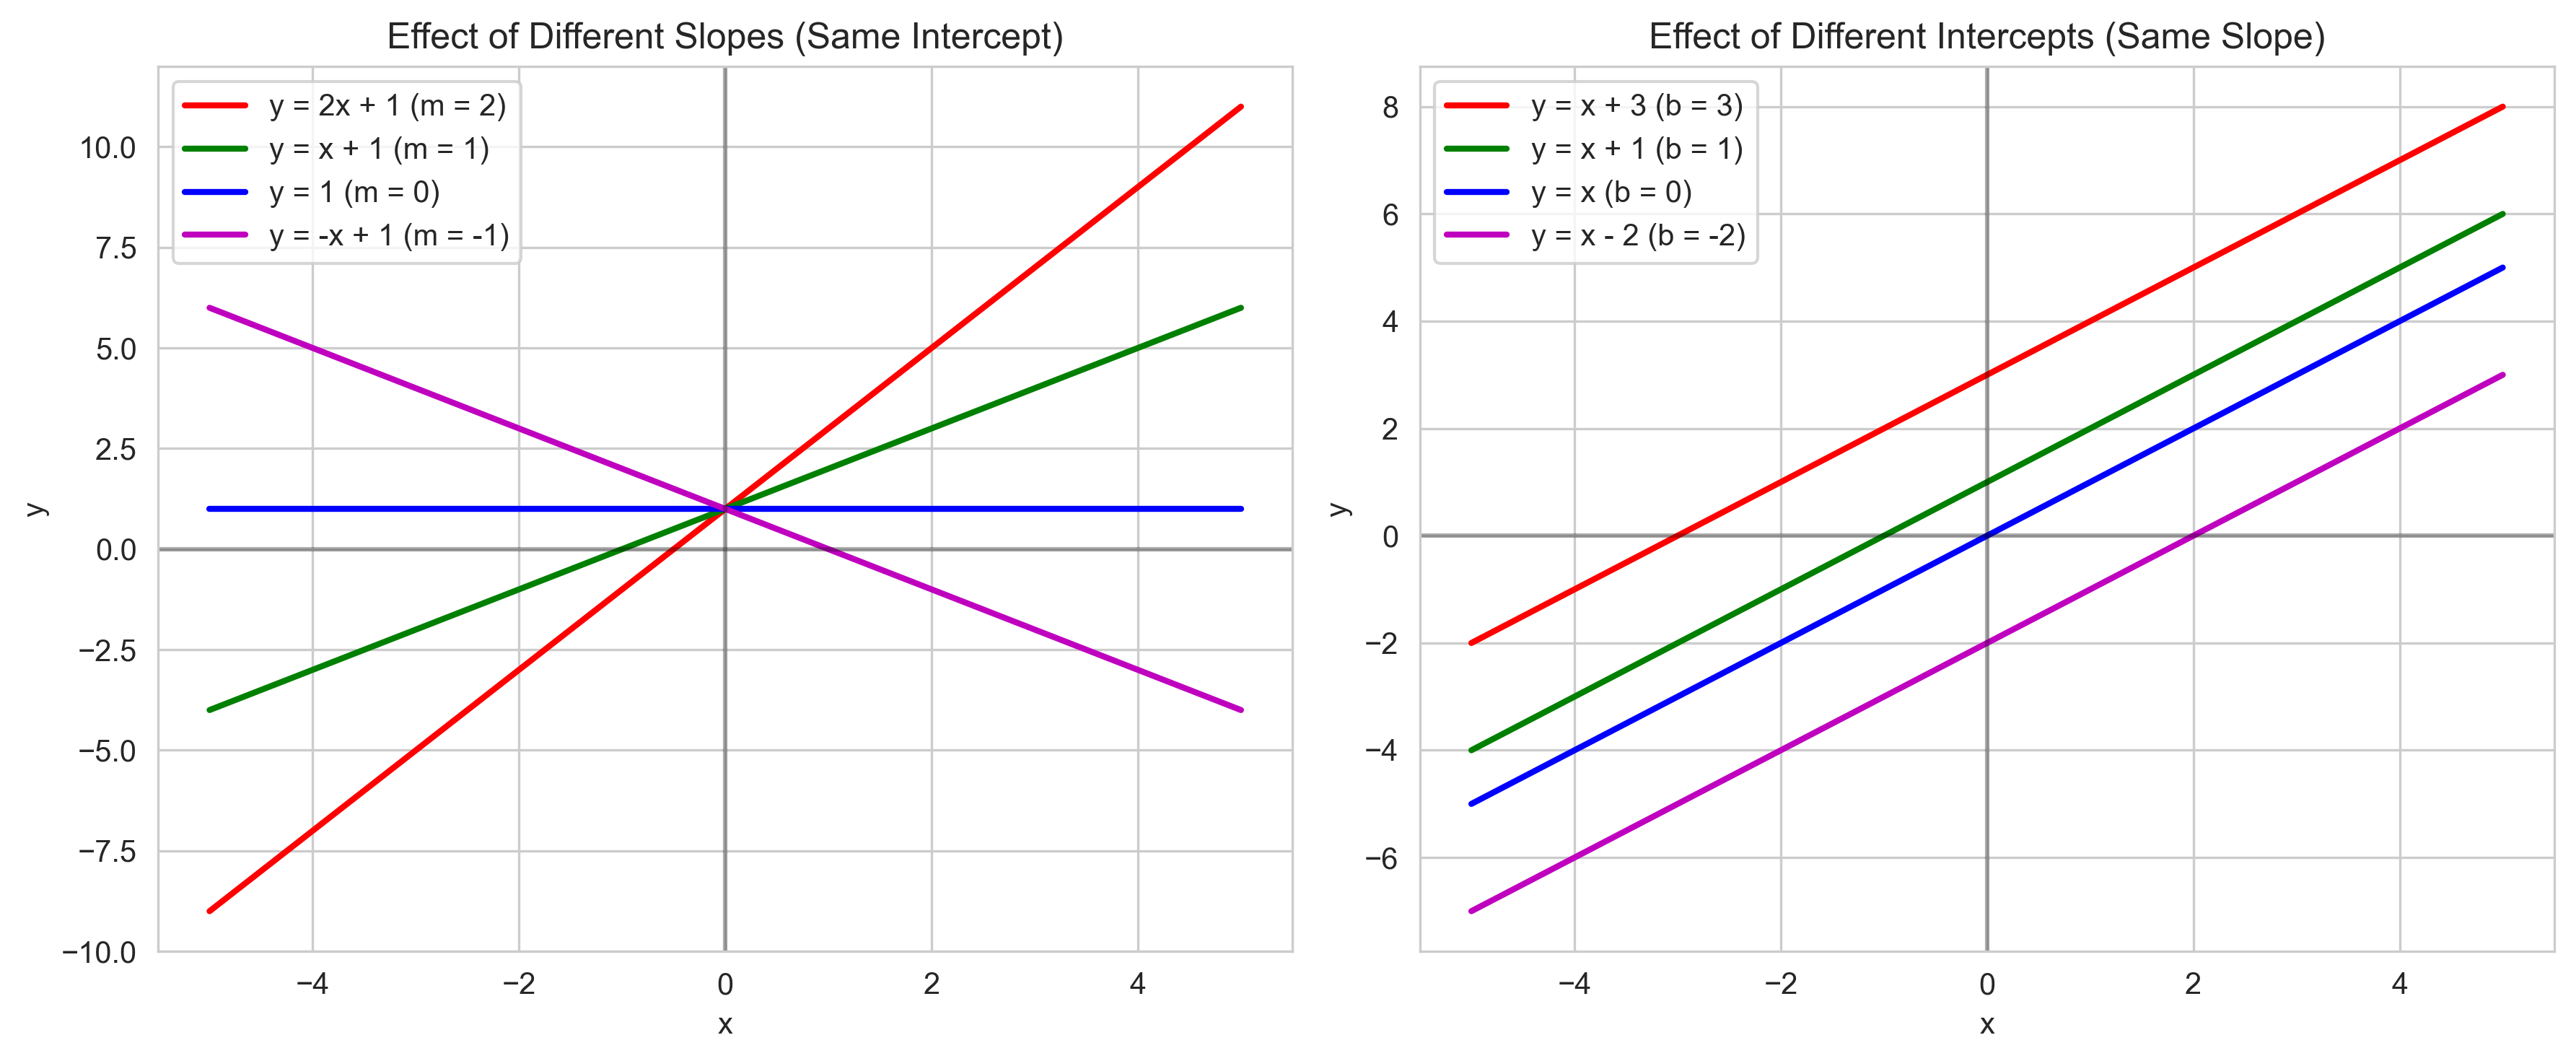

In [2]:
# Create a range of x values
x = np.linspace(-5, 5, 100)

# Plot lines with different slopes but same intercept
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, 2*x + 1, 'r-', linewidth=2, label='y = 2x + 1 (m = 2)')
plt.plot(x, 1*x + 1, 'g-', linewidth=2, label='y = x + 1 (m = 1)')
plt.plot(x, 0*x + 1, 'b-', linewidth=2, label='y = 1 (m = 0)')
plt.plot(x, -1*x + 1, 'm-', linewidth=2, label='y = -x + 1 (m = -1)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Effect of Different Slopes (Same Intercept)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot lines with same slope but different intercepts
plt.subplot(1, 2, 2)
plt.plot(x, 1*x + 3, 'r-', linewidth=2, label='y = x + 3 (b = 3)')
plt.plot(x, 1*x + 1, 'g-', linewidth=2, label='y = x + 1 (b = 1)')
plt.plot(x, 1*x + 0, 'b-', linewidth=2, label='y = x (b = 0)')
plt.plot(x, 1*x - 2, 'm-', linewidth=2, label='y = x - 2 (b = -2)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Effect of Different Intercepts (Same Slope)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### Psychological Example: Reaction Time and Age

Let's consider a psychological example: the relationship between age and reaction time. Research suggests that reaction time tends to increase with age. We might model this relationship with a linear equation:

$$RT = 200 + 2 \times Age$$

Where:
- $RT$ is the reaction time in milliseconds
- $Age$ is the person's age in years
- $200$ is the baseline reaction time (y-intercept)
- $2$ is the rate of increase in reaction time per year (slope)

Let's visualize this relationship and interpret what it means:

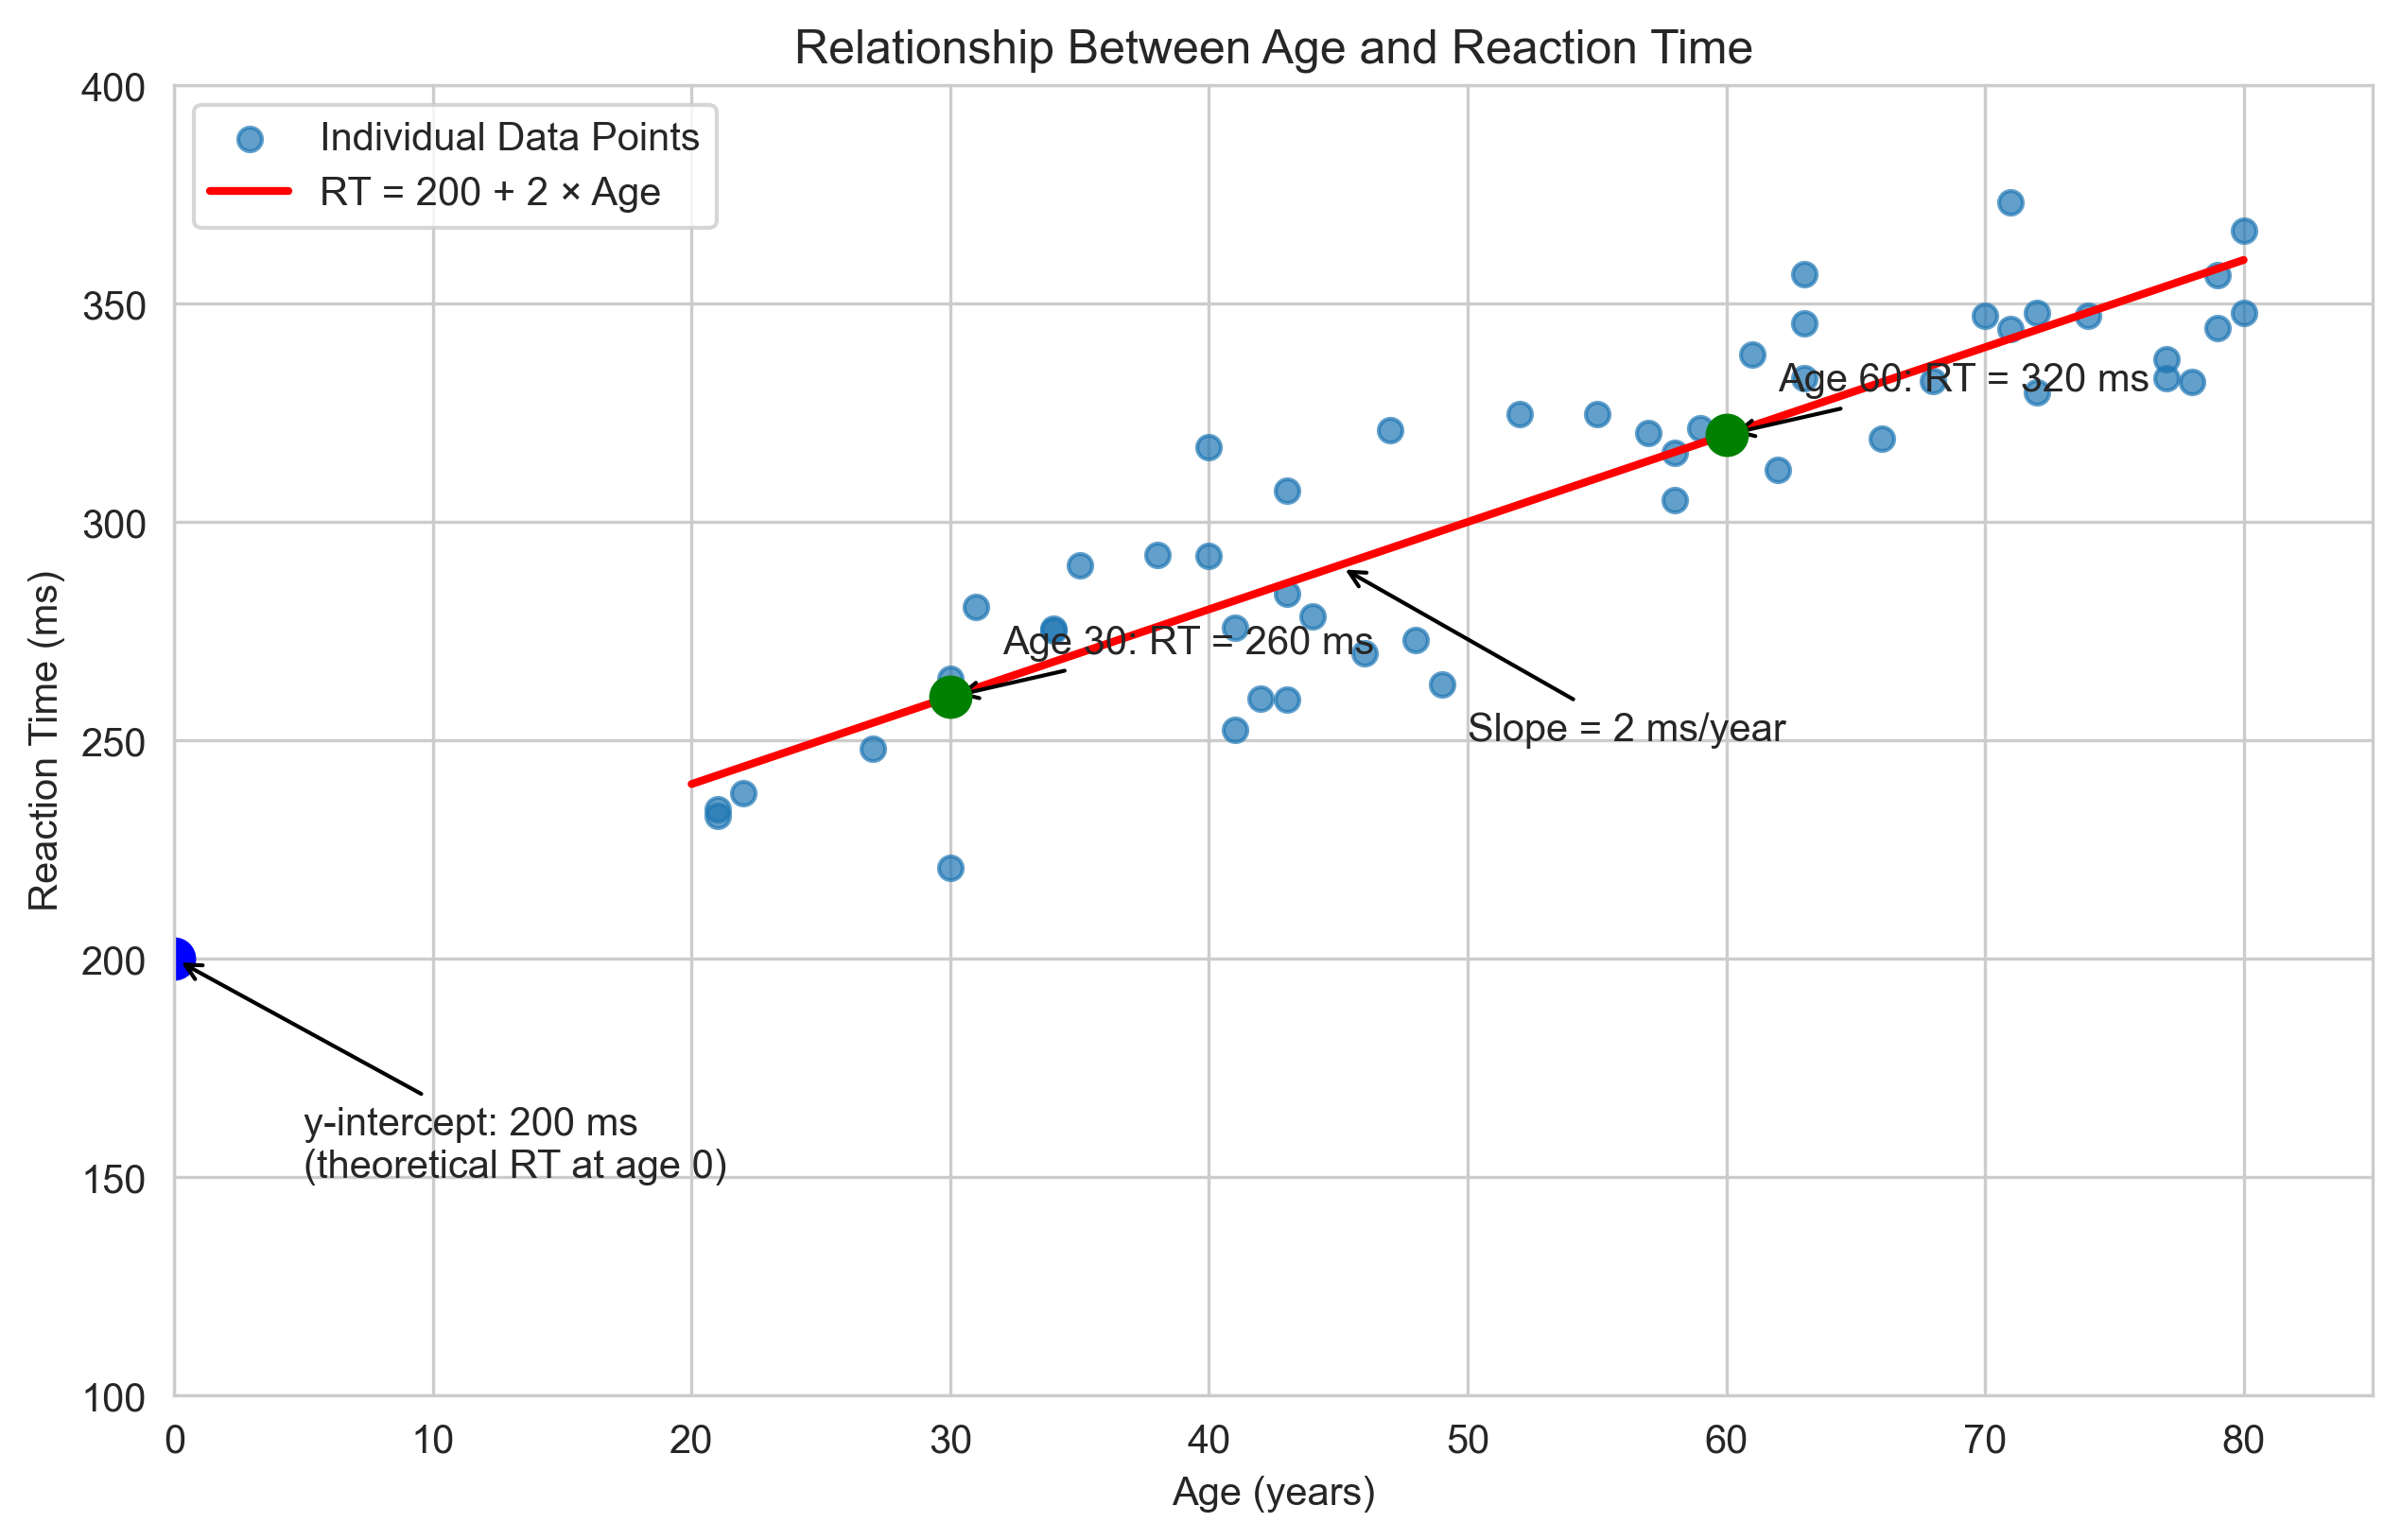

Interpretation of the linear model RT = 200 + 2 × Age:
- The y-intercept (200 ms) represents the theoretical reaction time at age 0
- The slope (2 ms/year) means that reaction time increases by 2 ms for each year of age
- For a 30-year-old, the predicted reaction time is 200 + 2×30 = 260 ms
- For a 60-year-old, the predicted reaction time is 200 + 2×60 = 320 ms
- The difference in reaction time between ages 30 and 60 is 320 - 260 = 60 ms
  This matches our slope: 2 ms/year × 30 years = 60 ms


In [3]:
# Create a range of ages from 20 to 80
ages = np.linspace(20, 80, 100)
reaction_times = 200 + 2 * ages

# Create some simulated data with noise
np.random.seed(42)  # For reproducibility
sample_ages = np.random.randint(20, 81, 50)  # 50 people aged 20-80
sample_rt = 200 + 2 * sample_ages + np.random.normal(0, 20, 50)  # Add some noise

plt.figure(figsize=(10, 6))
plt.scatter(sample_ages, sample_rt, alpha=0.7, label='Individual Data Points')
plt.plot(ages, reaction_times, 'r-', linewidth=2, label='RT = 200 + 2 × Age')

# Highlight specific points
plt.scatter([30, 60], [200 + 2*30, 200 + 2*60], color='green', s=100, zorder=5)
plt.annotate(f"Age 30: RT = {200 + 2*30} ms", xy=(30, 200 + 2*30), xytext=(32, 270),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(f"Age 60: RT = {200 + 2*60} ms", xy=(60, 200 + 2*60), xytext=(62, 330),
             arrowprops=dict(arrowstyle="->", color='black'))

# Highlight the slope
plt.annotate("Slope = 2 ms/year", xy=(45, 290), xytext=(50, 250),
             arrowprops=dict(arrowstyle="->", color='black'))

# Highlight the y-intercept
plt.scatter([0], [200], color='blue', s=100)
plt.annotate("y-intercept: 200 ms\n(theoretical RT at age 0)", xy=(0, 200), xytext=(5, 150),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.title('Relationship Between Age and Reaction Time')
plt.xlabel('Age (years)')
plt.ylabel('Reaction Time (ms)')
plt.grid(True)
plt.legend()
plt.xlim(0, 85)
plt.ylim(100, 400)
plt.show()

# Interpret the model
print("Interpretation of the linear model RT = 200 + 2 × Age:")
print("- The y-intercept (200 ms) represents the theoretical reaction time at age 0")
print("- The slope (2 ms/year) means that reaction time increases by 2 ms for each year of age")
print("- For a 30-year-old, the predicted reaction time is 200 + 2×30 = 260 ms")
print("- For a 60-year-old, the predicted reaction time is 200 + 2×60 = 320 ms")
print("- The difference in reaction time between ages 30 and 60 is 320 - 260 = 60 ms")
print("  This matches our slope: 2 ms/year × 30 years = 60 ms")

## Different Forms of Linear Equations

Linear equations can be written in different forms, each useful in different contexts:

1. **Slope-Intercept Form**: $y = mx + b$
   - Most common form
   - Directly shows the slope and y-intercept
   - Easy to graph

2. **Point-Slope Form**: $y - y_1 = m(x - x_1)$
   - Useful when you know a point $(x_1, y_1)$ on the line and the slope $m$
   - Can be rearranged to slope-intercept form

3. **Standard Form**: $Ax + By = C$
   - Where $A$, $B$, and $C$ are constants, and usually $A \geq 0$
   - Useful in systems of equations

Let's practice converting between these forms:

In [4]:
from sympy import symbols, solve, Eq, simplify

# Define variables
x, y, m, b, x1, y1, A, B, C = symbols('x y m b x1 y1 A B C')

# Example 1: Convert from point-slope to slope-intercept form
# Point-slope form: y - 3 = 2(x - 4)
# Known values: point (4, 3), slope m = 2

# Start with point-slope form
point_slope = Eq(y - 3, 2*(x - 4))
print("Point-slope form:", point_slope)

# Expand the right side
expanded = point_slope.replace(y - 3, y - 3)
expanded = expanded.replace(2*(x - 4), 2*x - 8)
print("After expanding:", expanded)

# Solve for y
slope_intercept = solve(expanded, y)[0]
print("Slope-intercept form: y =", slope_intercept)

# Example 2: Convert from standard form to slope-intercept form
# Standard form: 3x + 2y = 12

# Start with standard form
standard = Eq(3*x + 2*y, 12)
print("\nStandard form:", standard)

# Solve for y
slope_intercept2 = solve(standard, y)[0]
print("Slope-intercept form: y =", slope_intercept2)

Point-slope form: Eq(y - 3, 2*x - 8)
After expanding: Eq(y - 3, 2*x - 8)
Slope-intercept form: y = 2*x - 5

Standard form: Eq(3*x + 2*y, 12)
Slope-intercept form: y = 6 - 3*x/2


### Finding the Equation of a Line

In psychological research, we often need to find the equation of a line that best represents our data. There are several ways to find a linear equation:

1. **Given the slope and y-intercept**: Directly use $y = mx + b$
2. **Given the slope and a point**: Use point-slope form, then convert to slope-intercept form
3. **Given two points**: Calculate the slope, then use point-slope form

Let's practice these methods with psychological examples:

In [5]:
# Method 1: Given slope and y-intercept
# Example: In a learning experiment, the number of errors (E) decreases with practice trials (T)
# with a slope of -0.5 errors per trial and an initial error count of 10

slope = -0.5  # Errors decrease by 0.5 per trial
intercept = 10  # 10 errors on the first trial (when T = 0)

# The equation is: E = -0.5T + 10
print("Method 1: Given slope and y-intercept")
print(f"Equation: E = {slope}T + {intercept}")
print(f"This means errors decrease by {abs(slope)} per trial, starting from {intercept} errors.")

# Method 2: Given slope and a point
# Example: In a memory study, recall percentage (R) decreases with time (t)
# with a slope of -5% per hour. After 2 hours, recall is 80%.

slope = -5  # Recall decreases by 5% per hour
point_x = 2  # 2 hours
point_y = 80  # 80% recall

# Use point-slope form: R - 80 = -5(t - 2)
# Expand: R - 80 = -5t + 10
# Solve for R: R = -5t + 10 + 80 = -5t + 90

intercept = point_y - slope * point_x
print("\nMethod 2: Given slope and a point")
print(f"Point: ({point_x}, {point_y})")
print(f"Slope: {slope}")
print(f"Equation: R = {slope}t + {intercept}")
print(f"This means initial recall (at t = 0) was {intercept}%, decreasing by {abs(slope)}% per hour.")

# Method 3: Given two points
# Example: In a study on stress and performance, researchers found that:
# - At stress level 30, performance score was 70
# - At stress level 70, performance score was 90

x1, y1 = 30, 70  # First point: stress = 30, performance = 70
x2, y2 = 70, 90  # Second point: stress = 70, performance = 90

# Calculate slope: m = (y2 - y1) / (x2 - x1)
slope = (y2 - y1) / (x2 - x1)

# Use point-slope form with the first point: P - 70 = slope(S - 30)
# Calculate y-intercept: b = y1 - m*x1
intercept = y1 - slope * x1

print("\nMethod 3: Given two points")
print(f"Point 1: ({x1}, {y1})")
print(f"Point 2: ({x2}, {y2})")
print(f"Calculated slope: {slope}")
print(f"Equation: P = {slope}S + {intercept}")
print(f"This means performance increases by {slope} units for each unit increase in stress.")

Method 1: Given slope and y-intercept
Equation: E = -0.5T + 10
This means errors decrease by 0.5 per trial, starting from 10 errors.

Method 2: Given slope and a point
Point: (2, 80)
Slope: -5
Equation: R = -5t + 90
This means initial recall (at t = 0) was 90%, decreasing by 5% per hour.

Method 3: Given two points
Point 1: (30, 70)
Point 2: (70, 90)
Calculated slope: 0.5
Equation: P = 0.5S + 55.0
This means performance increases by 0.5 units for each unit increase in stress.


Let's visualize these examples:

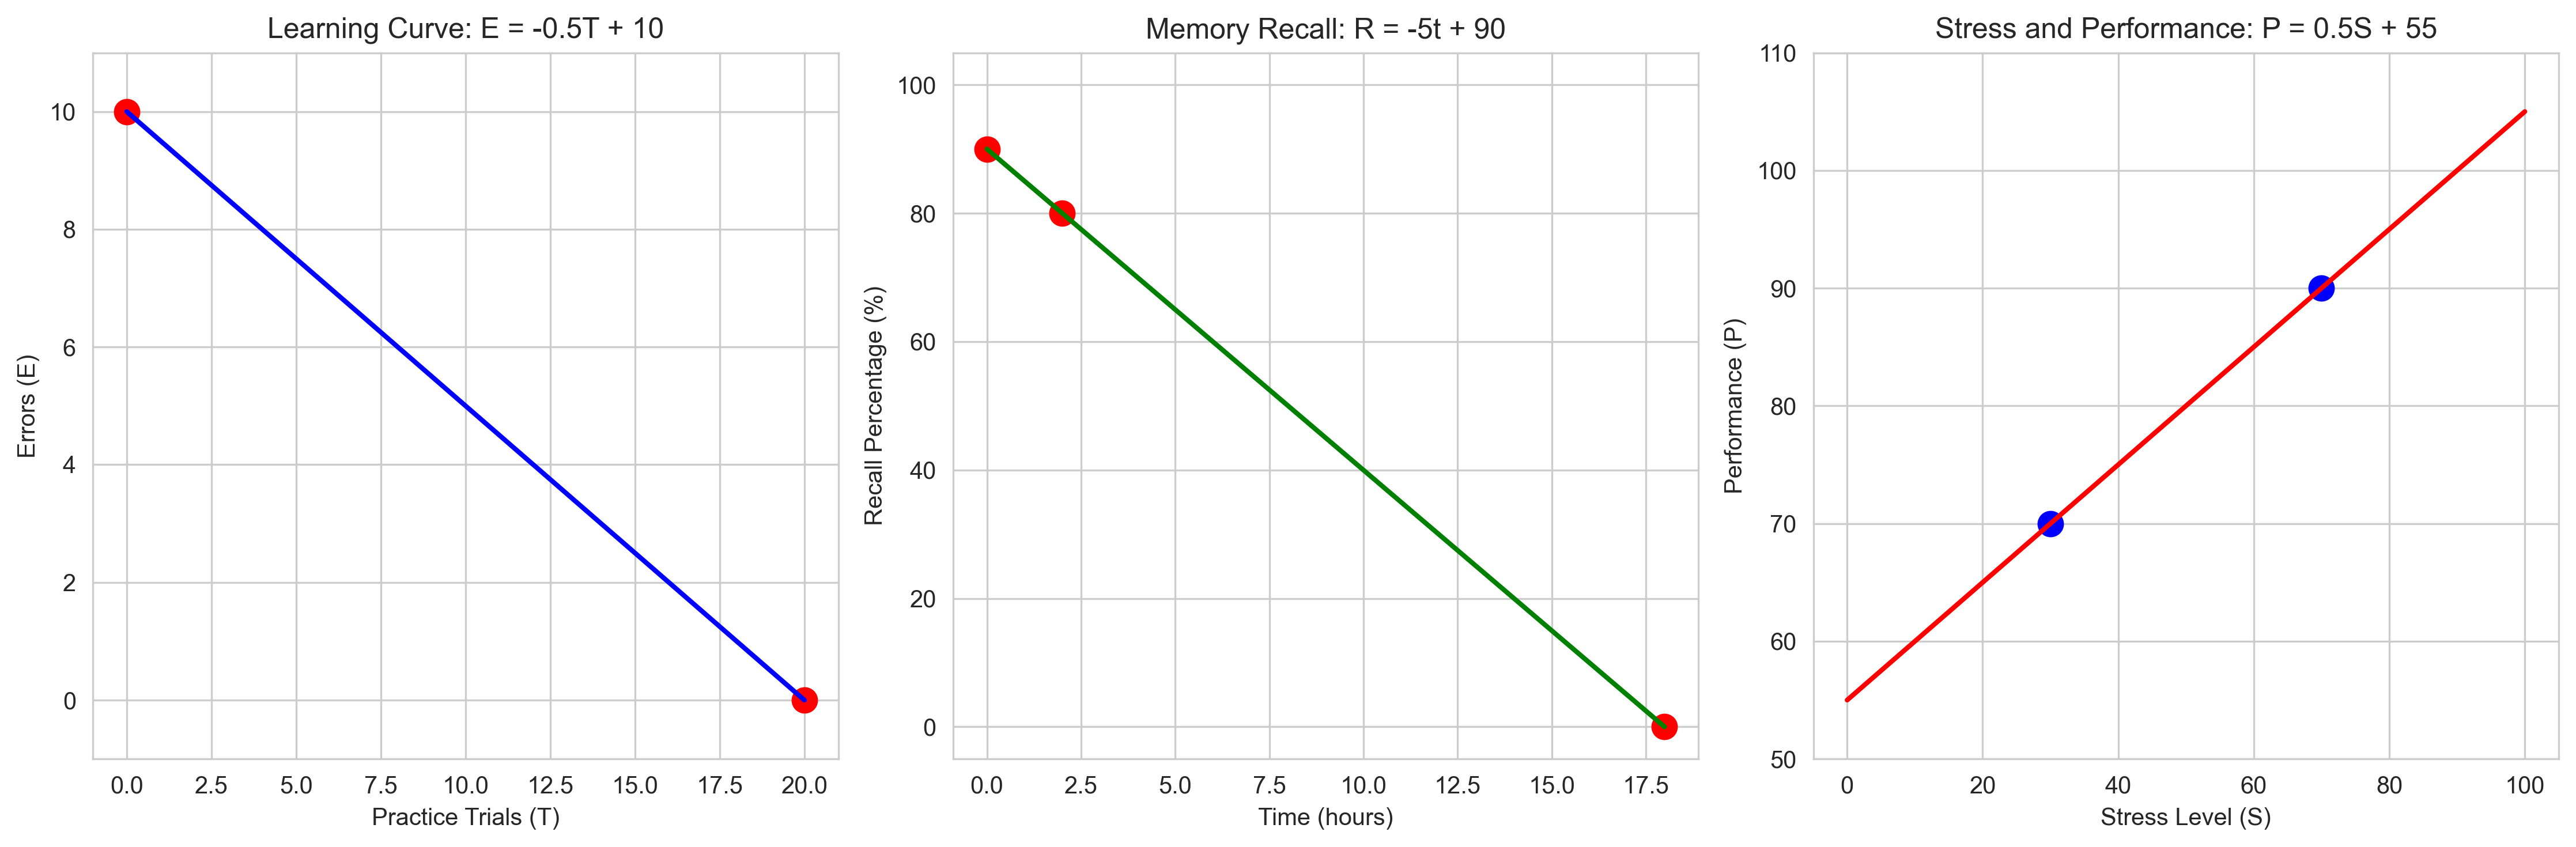

In [6]:
plt.figure(figsize=(15, 5))

# Example 1: Learning curve
plt.subplot(1, 3, 1)
trials = np.arange(0, 21)
errors = -0.5 * trials + 10
plt.plot(trials, errors, 'b-', linewidth=2)
plt.scatter([0, 20], [10, 0], color='red', s=100)
plt.title('Learning Curve: E = -0.5T + 10')
plt.xlabel('Practice Trials (T)')
plt.ylabel('Errors (E)')
plt.grid(True)
plt.ylim(-1, 11)

# Example 2: Memory recall
plt.subplot(1, 3, 2)
time = np.linspace(0, 18, 100)
recall = -5 * time + 90
recall = np.clip(recall, 0, 100)  # Ensure recall is between 0-100%
plt.plot(time, recall, 'g-', linewidth=2)
plt.scatter([0, 2, 18], [90, 80, 0], color='red', s=100)
plt.title('Memory Recall: R = -5t + 90')
plt.xlabel('Time (hours)')
plt.ylabel('Recall Percentage (%)')
plt.grid(True)
plt.ylim(-5, 105)

# Example 3: Stress and performance
plt.subplot(1, 3, 3)
stress = np.linspace(0, 100, 100)
performance = 0.5 * stress + 55
plt.plot(stress, performance, 'r-', linewidth=2)
plt.scatter([30, 70], [70, 90], color='blue', s=100)
plt.title('Stress and Performance: P = 0.5S + 55')
plt.xlabel('Stress Level (S)')
plt.ylabel('Performance (P)')
plt.grid(True)
plt.ylim(50, 110)

plt.tight_layout()
plt.show()

## Parallel and Perpendicular Lines

Understanding parallel and perpendicular lines can be useful in psychological research, especially when comparing different experimental conditions or groups.

**Parallel Lines**:
- Have the same slope
- Never intersect
- Equation form: $y = mx + b_1$ and $y = mx + b_2$ (same $m$, different $b$)

**Perpendicular Lines**:
- Have slopes that are negative reciprocals of each other: $m_1 \times m_2 = -1$
- Intersect at a 90-degree angle
- If one line has slope $m$, the perpendicular line has slope $-\frac{1}{m}$

Let's visualize these concepts:

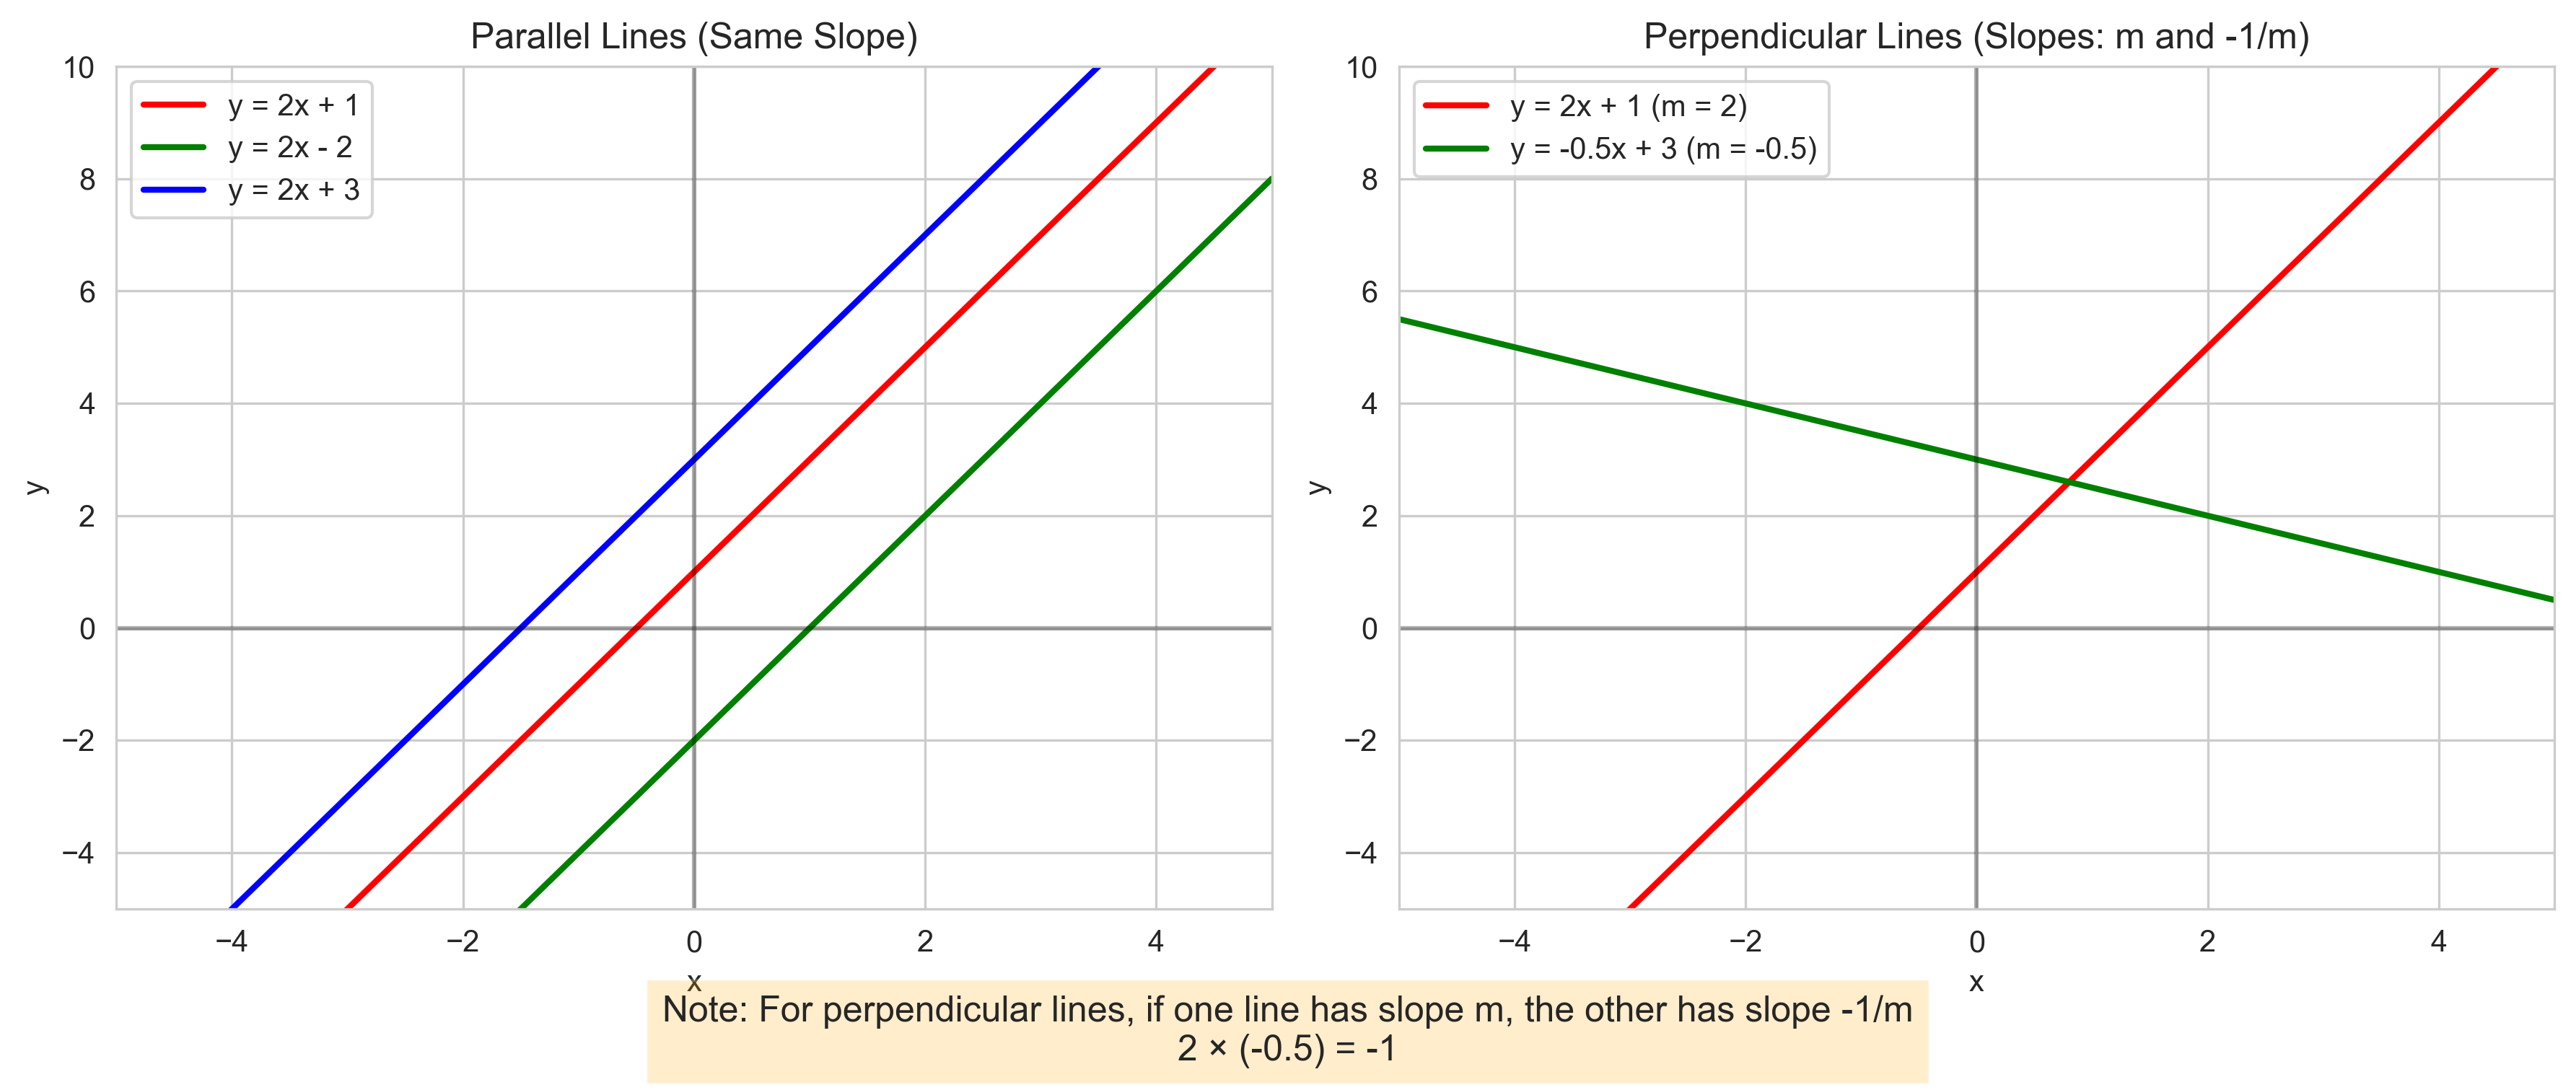

In [7]:
# Create a range of x values
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 5))

# Parallel lines
plt.subplot(1, 2, 1)
plt.plot(x, 2*x + 1, 'r-', linewidth=2, label='y = 2x + 1')
plt.plot(x, 2*x - 2, 'g-', linewidth=2, label='y = 2x - 2')
plt.plot(x, 2*x + 3, 'b-', linewidth=2, label='y = 2x + 3')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Parallel Lines (Same Slope)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 10)

# Perpendicular lines
plt.subplot(1, 2, 2)
plt.plot(x, 2*x + 1, 'r-', linewidth=2, label='y = 2x + 1 (m = 2)')
plt.plot(x, -0.5*x + 3, 'g-', linewidth=2, label='y = -0.5x + 3 (m = -0.5)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Perpendicular Lines (Slopes: m and -1/m)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 10)

# Add a note about the slopes
plt.figtext(0.5, 0.01, "Note: For perpendicular lines, if one line has slope m, the other has slope -1/m\n2 × (-0.5) = -1", 
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

### Psychological Example: Comparing Groups

Let's consider a psychological example where parallel and perpendicular lines might be relevant. Imagine we're studying the relationship between study time and test scores for two different groups of students: those using a traditional study method and those using a new method.

- **Parallel lines** would indicate that the rate of improvement (slope) is the same for both groups, but one group consistently performs better (different intercepts).
- **Perpendicular lines** would indicate a fundamentally different relationship between study time and performance for the two groups.

Let's visualize this:

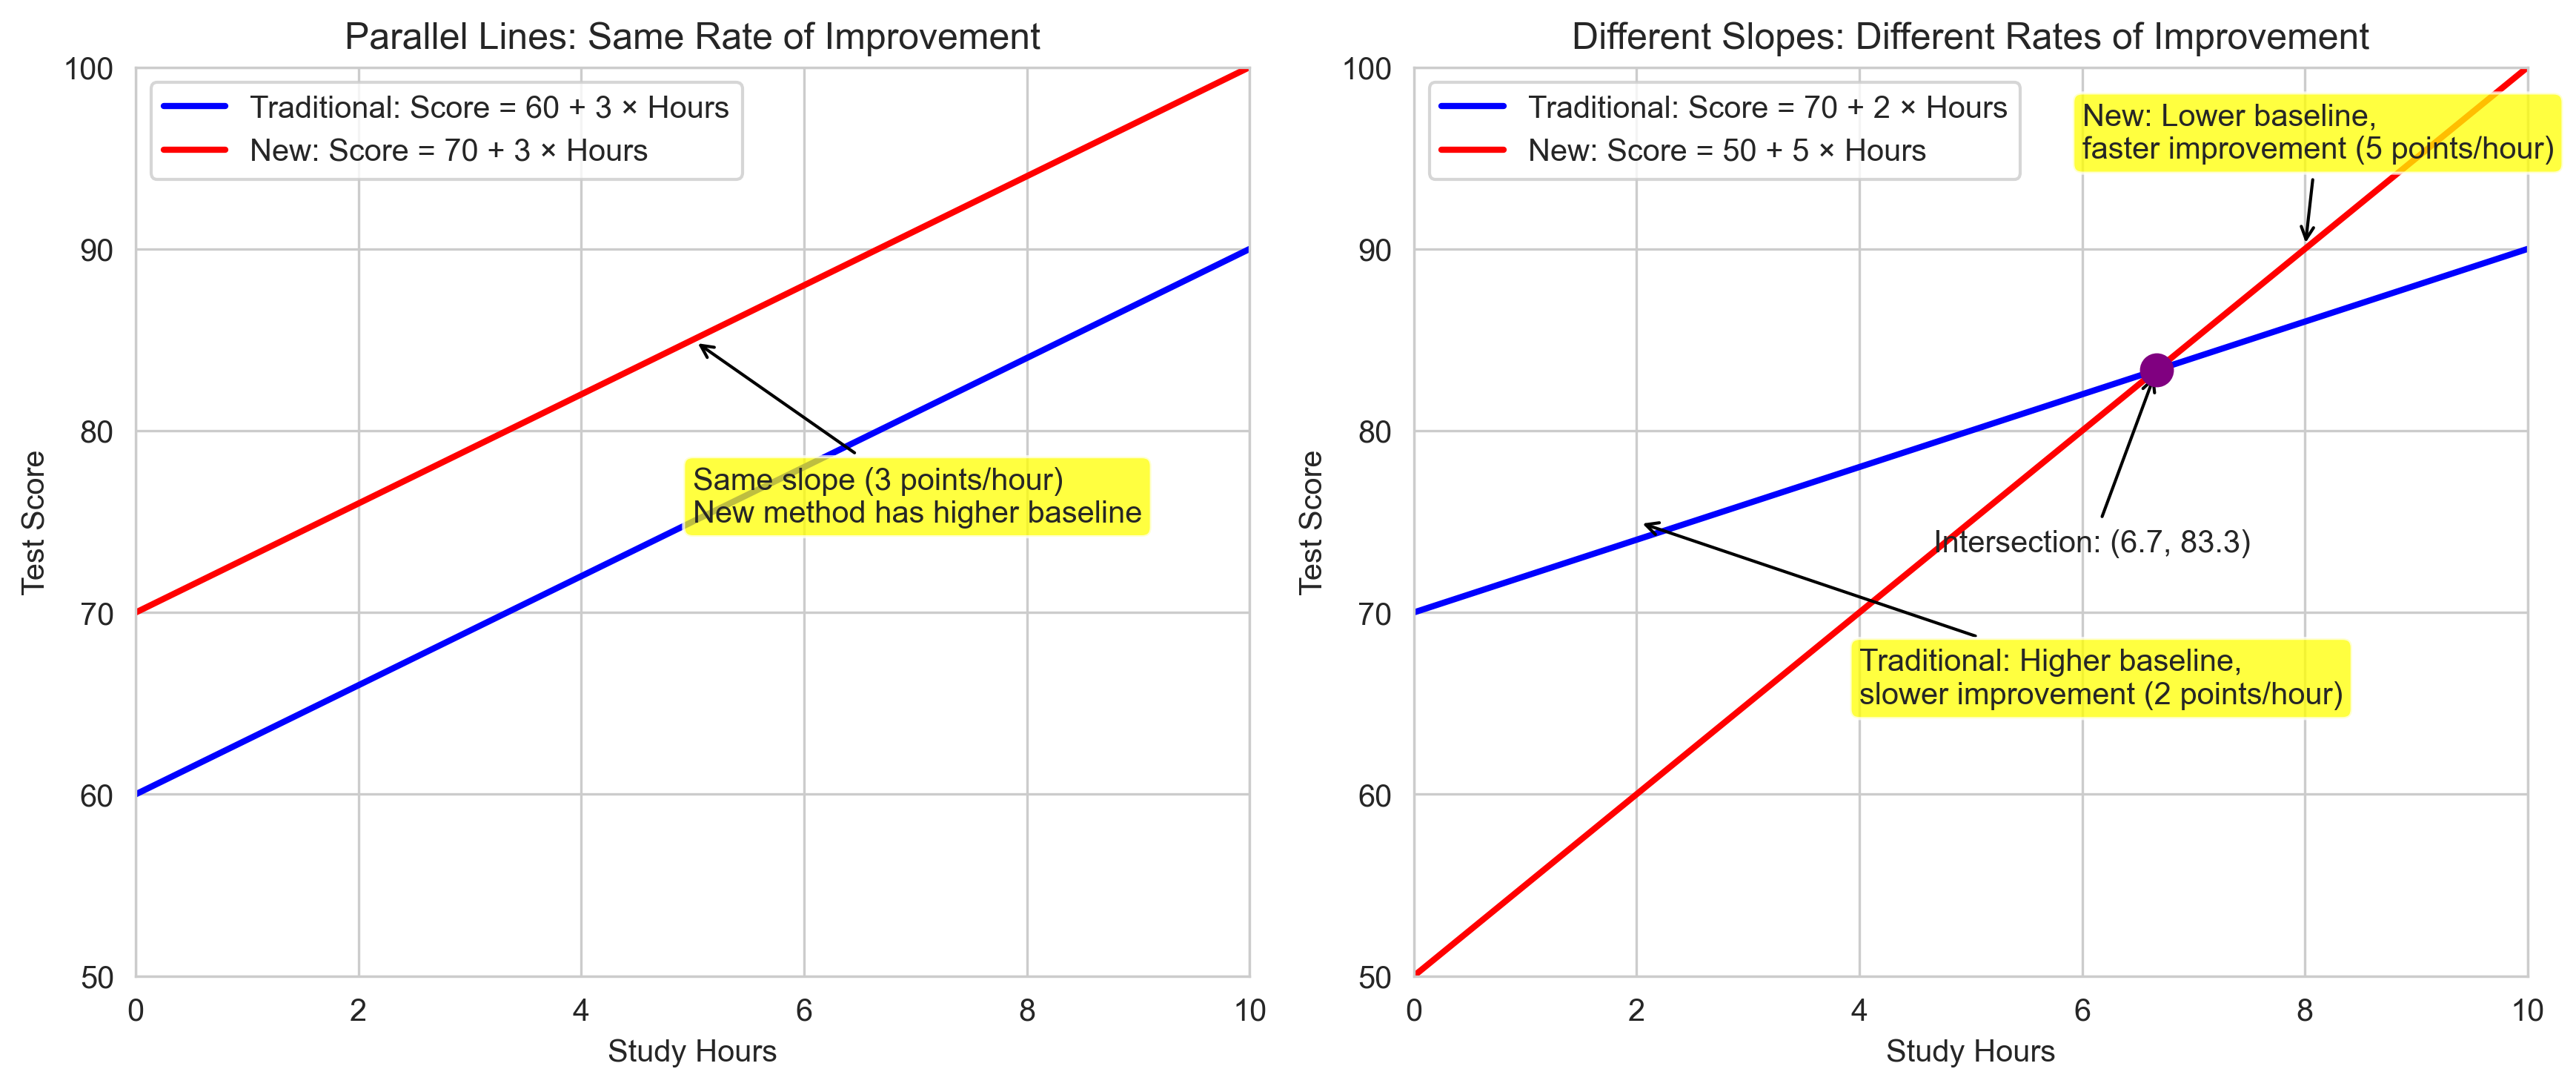

In [8]:
# Create a range of study hours
study_hours = np.linspace(0, 10, 100)

plt.figure(figsize=(12, 5))

# Scenario 1: Parallel lines (same rate of improvement, different baseline)
plt.subplot(1, 2, 1)
traditional_scores1 = 60 + 3 * study_hours  # Traditional method: Score = 60 + 3 × Hours
new_scores1 = 70 + 3 * study_hours          # New method: Score = 70 + 3 × Hours

plt.plot(study_hours, traditional_scores1, 'b-', linewidth=2, label='Traditional: Score = 60 + 3 × Hours')
plt.plot(study_hours, new_scores1, 'r-', linewidth=2, label='New: Score = 70 + 3 × Hours')
plt.title('Parallel Lines: Same Rate of Improvement')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(50, 100)

# Add interpretation
plt.annotate("Same slope (3 points/hour)\nNew method has higher baseline", 
             xy=(5, 85), xytext=(5, 75),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))

# Scenario 2: Different relationships (different slopes)
plt.subplot(1, 2, 2)
traditional_scores2 = 70 + 2 * study_hours   # Traditional: Score = 70 + 2 × Hours
new_scores2 = 50 + 5 * study_hours           # New: Score = 50 + 5 × Hours

plt.plot(study_hours, traditional_scores2, 'b-', linewidth=2, label='Traditional: Score = 70 + 2 × Hours')
plt.plot(study_hours, new_scores2, 'r-', linewidth=2, label='New: Score = 50 + 5 × Hours')
plt.title('Different Slopes: Different Rates of Improvement')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(50, 100)

# Add interpretation
plt.annotate("Traditional: Higher baseline,\nslower improvement (2 points/hour)", 
             xy=(2, 75), xytext=(4, 65),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))

plt.annotate("New: Lower baseline,\nfaster improvement (5 points/hour)", 
             xy=(8, 90), xytext=(6, 95),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))

# Add intersection point
# Solve: 70 + 2x = 50 + 5x
# 20 = 3x
# x = 6.67
intersection_x = 20/3
intersection_y = 70 + 2*intersection_x
plt.scatter([intersection_x], [intersection_y], color='purple', s=100, zorder=5)
plt.annotate(f"Intersection: ({intersection_x:.1f}, {intersection_y:.1f})", 
             xy=(intersection_x, intersection_y), xytext=(intersection_x-2, intersection_y-10),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.tight_layout()
plt.show()

## Finding Intersections of Lines

Finding where two lines intersect is a common task in data analysis. The intersection represents the point where two different relationships yield the same outcome.

To find the intersection of two lines:
1. Set the equations equal to each other
2. Solve for the x-coordinate
3. Substitute back to find the y-coordinate

Let's solve for the intersection in our previous example algebraically:

In [9]:
from sympy import symbols, solve, Eq

# Define variables
x = symbols('x')

# Traditional method: y = 70 + 2x
# New method: y = 50 + 5x
# Set equal: 70 + 2x = 50 + 5x

equation = Eq(70 + 2*x, 50 + 5*x)
solution = solve(equation, x)
intersection_x = solution[0]
intersection_y = 70 + 2*intersection_x

print(f"Intersection point: x = {intersection_x}, y = {intersection_y}")
print("\nInterpretation:")
print(f"At {intersection_x:.1f} hours of study, both methods yield the same score of {intersection_y:.1f}.")
print("Before this point, the traditional method gives higher scores.")
print("After this point, the new method gives higher scores.")

Intersection point: x = 20/3, y = 250/3

Interpretation:
At 6.7 hours of study, both methods yield the same score of 83.3.
Before this point, the traditional method gives higher scores.
After this point, the new method gives higher scores.


### Psychological Example: Crossover Interaction

In psychology, when two lines intersect in a graph, it often represents what's called a **crossover interaction**. This means that the effect of one variable depends on the level of another variable.

Let's consider an example from cognitive psychology: the speed-accuracy tradeoff in a decision-making task. Participants can be instructed to prioritize either speed or accuracy. Let's model how the error rate changes with time pressure for these two instruction conditions:

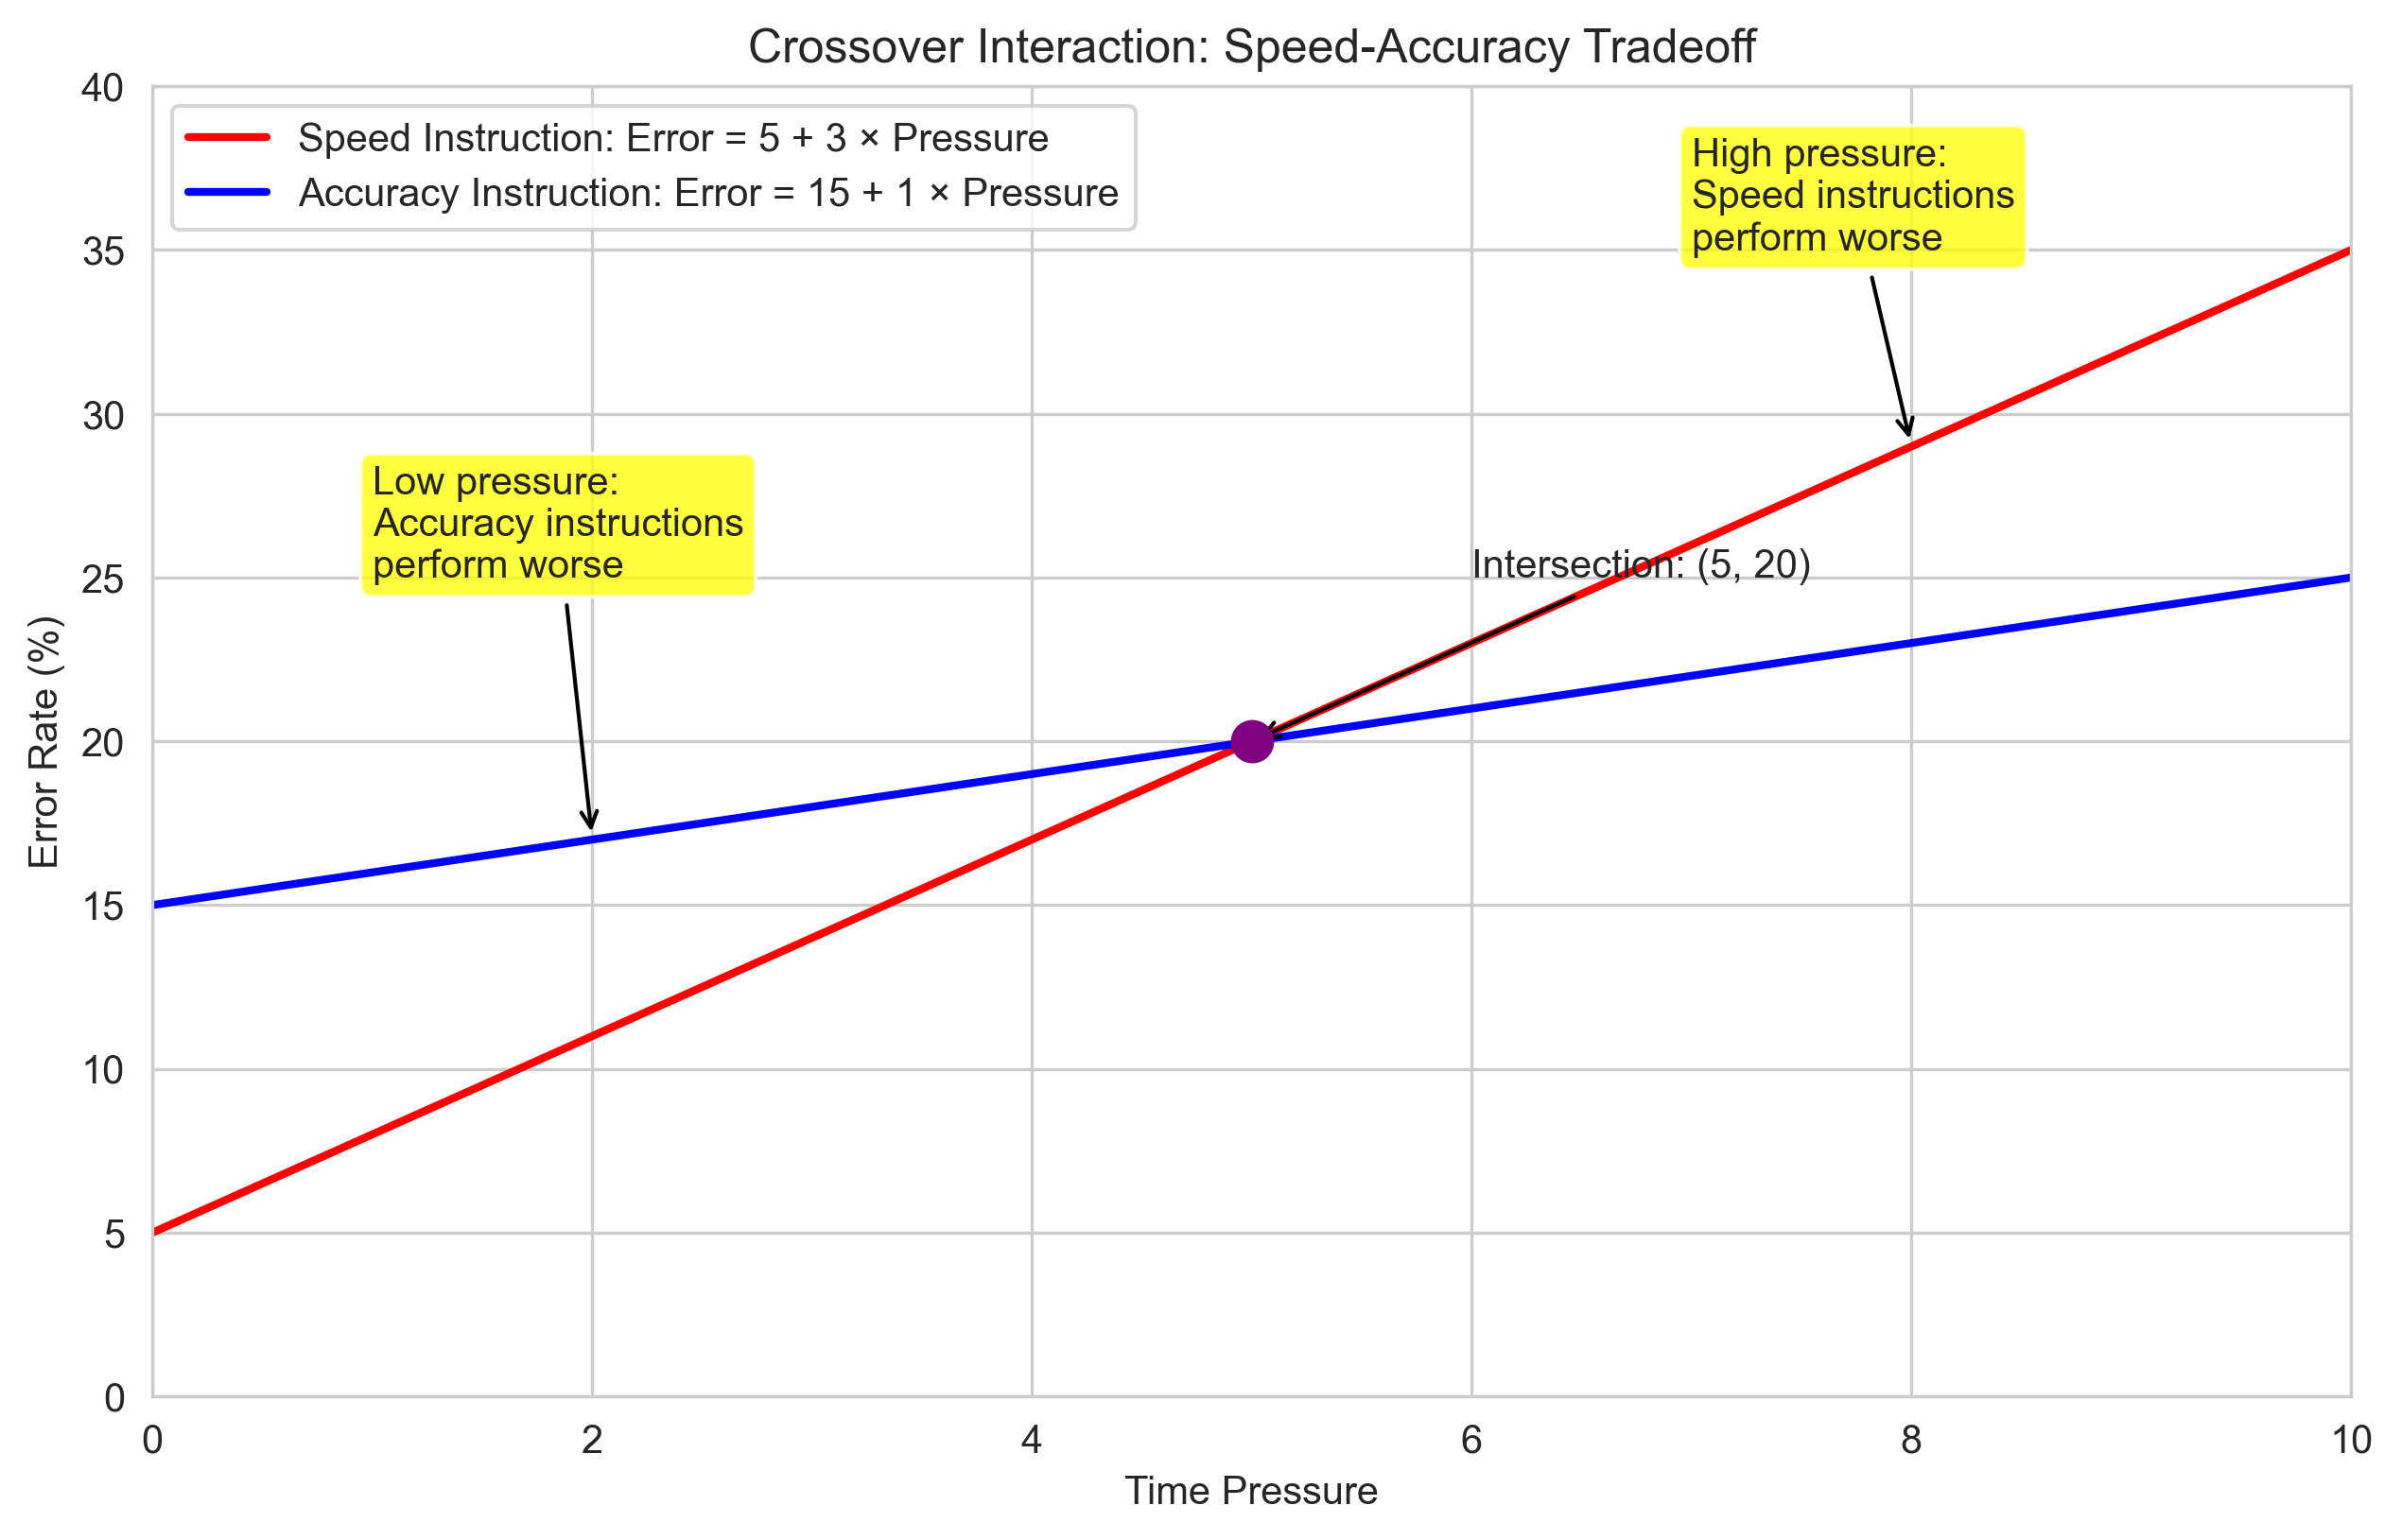

Interpretation of the Crossover Interaction:
- Under low time pressure (< 5), accuracy instructions lead to more errors than speed instructions.
  This might be because participants overthink their responses when focusing on accuracy.
- Under high time pressure (> 5), speed instructions lead to more errors than accuracy instructions.
  This might be because the combined pressure of the task and instructions causes hasty mistakes.
- At the crossover point (time pressure = 5), both instruction types yield the same error rate.
- This interaction suggests that the optimal instruction depends on the level of time pressure.


In [10]:
# Create a range of time pressure values (0 = low pressure, 10 = high pressure)
time_pressure = np.linspace(0, 10, 100)

# Model error rates for different instructions
# Speed instruction: Error = 5 + 3 × Pressure
# Accuracy instruction: Error = 15 + 1 × Pressure
speed_errors = 5 + 3 * time_pressure
accuracy_errors = 15 + 1 * time_pressure

# Find intersection
# 5 + 3x = 15 + 1x
# 2x = 10
# x = 5
intersection_x = 5
intersection_y = 5 + 3 * intersection_x

plt.figure(figsize=(10, 6))
plt.plot(time_pressure, speed_errors, 'r-', linewidth=2, label='Speed Instruction: Error = 5 + 3 × Pressure')
plt.plot(time_pressure, accuracy_errors, 'b-', linewidth=2, label='Accuracy Instruction: Error = 15 + 1 × Pressure')
plt.scatter([intersection_x], [intersection_y], color='purple', s=100, zorder=5)

plt.title('Crossover Interaction: Speed-Accuracy Tradeoff')
plt.xlabel('Time Pressure')
plt.ylabel('Error Rate (%)')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 40)

# Add annotations
plt.annotate(f"Intersection: ({intersection_x}, {intersection_y})", 
             xy=(intersection_x, intersection_y), xytext=(intersection_x+1, intersection_y+5),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.annotate("Low pressure:\nAccuracy instructions\nperform worse", 
             xy=(2, 17), xytext=(1, 25),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))

plt.annotate("High pressure:\nSpeed instructions\nperform worse", 
             xy=(8, 29), xytext=(7, 35),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))

plt.show()

print("Interpretation of the Crossover Interaction:")
print("- Under low time pressure (< 5), accuracy instructions lead to more errors than speed instructions.")
print("  This might be because participants overthink their responses when focusing on accuracy.")
print("- Under high time pressure (> 5), speed instructions lead to more errors than accuracy instructions.")
print("  This might be because the combined pressure of the task and instructions causes hasty mistakes.")
print("- At the crossover point (time pressure = 5), both instruction types yield the same error rate.")
print("- This interaction suggests that the optimal instruction depends on the level of time pressure.")

## Linear Inequalities

Linear inequalities are similar to linear equations, but instead of an equals sign, they use inequality symbols: $<$, $>$, $\leq$, or $\geq$.

For example:
- $y < 2x + 3$
- $y \geq -x + 5$

When graphing linear inequalities:
1. Graph the boundary line (using a solid line for $\leq$ or $\geq$, and a dashed line for $<$ or $>$)
2. Shade the region that satisfies the inequality

In psychology, inequalities might represent:
- Thresholds or cutoff points
- Regions of acceptable performance
- Constraints in experimental design

Let's visualize some linear inequalities:

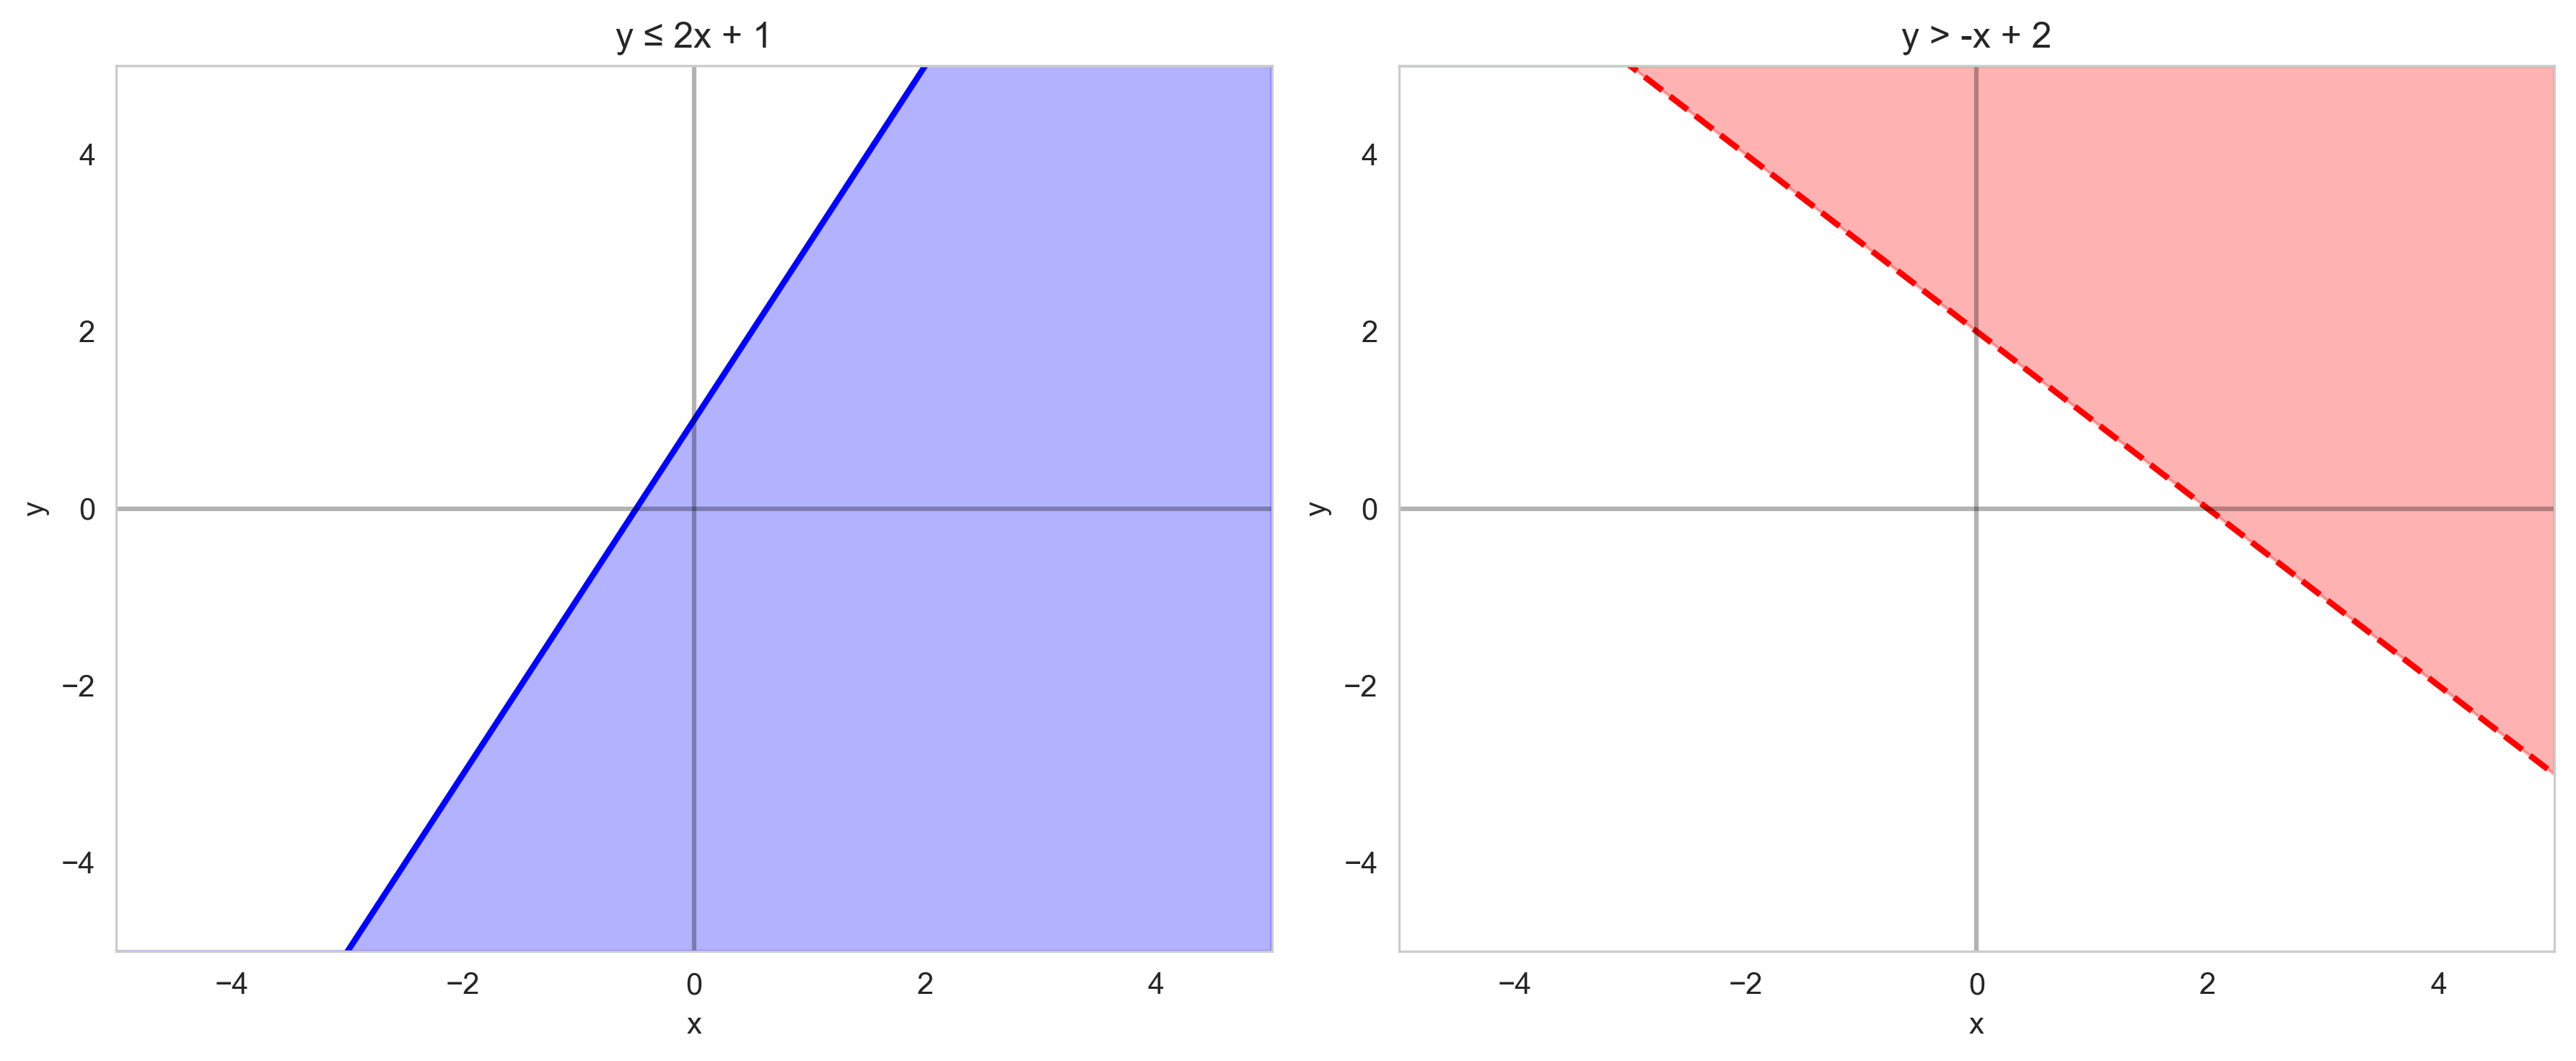

In [11]:
# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(12, 5))

# Example 1: y ≤ 2x + 1
plt.subplot(1, 2, 1)
plt.plot(x, 2*x + 1, 'b-', linewidth=2)  # Solid line for ≤
plt.fill_between(x, 2*x + 1, -5, alpha=0.3, color='blue')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('y ≤ 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(False)

# Example 2: y > -x + 2
plt.subplot(1, 2, 2)
plt.plot(x, -x + 2, 'r--', linewidth=2)  # Dashed line for >
plt.fill_between(x, -x + 2, 5, alpha=0.3, color='red')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('y > -x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.tight_layout()
plt.grid(False)
plt.show()

### Psychological Example: Performance Standards

Let's consider a psychological example where inequalities are useful. Imagine a cognitive assessment where performance is evaluated based on both accuracy and speed. To meet the standard, a participant must satisfy certain criteria:

1. Accuracy must be at least 70%
2. Response time must be less than 500 ms
3. A combined score (2 × Accuracy - Response Time/100) must be greater than 100

We can represent these criteria as inequalities and visualize the acceptable performance region:

Participant A: Meets all criteria
  Accuracy: 75% (✓)
  Response Time: 450ms (✓)
  Combined Score: 145.5 (✓)
  Overall: Acceptable

Participant B: Too low accuracy
  Accuracy: 65% (✗)
  Response Time: 475ms (✓)
  Combined Score: 125.25 (✓)
  Overall: Not Acceptable

Participant C: Too slow
  Accuracy: 75% (✓)
  Response Time: 550ms (✗)
  Combined Score: 144.5 (✓)
  Overall: Not Acceptable

Participant D: Combined score too low
  Accuracy: 85% (✓)
  Response Time: 480ms (✓)
  Combined Score: 165.2 (✓)
  Overall: Acceptable



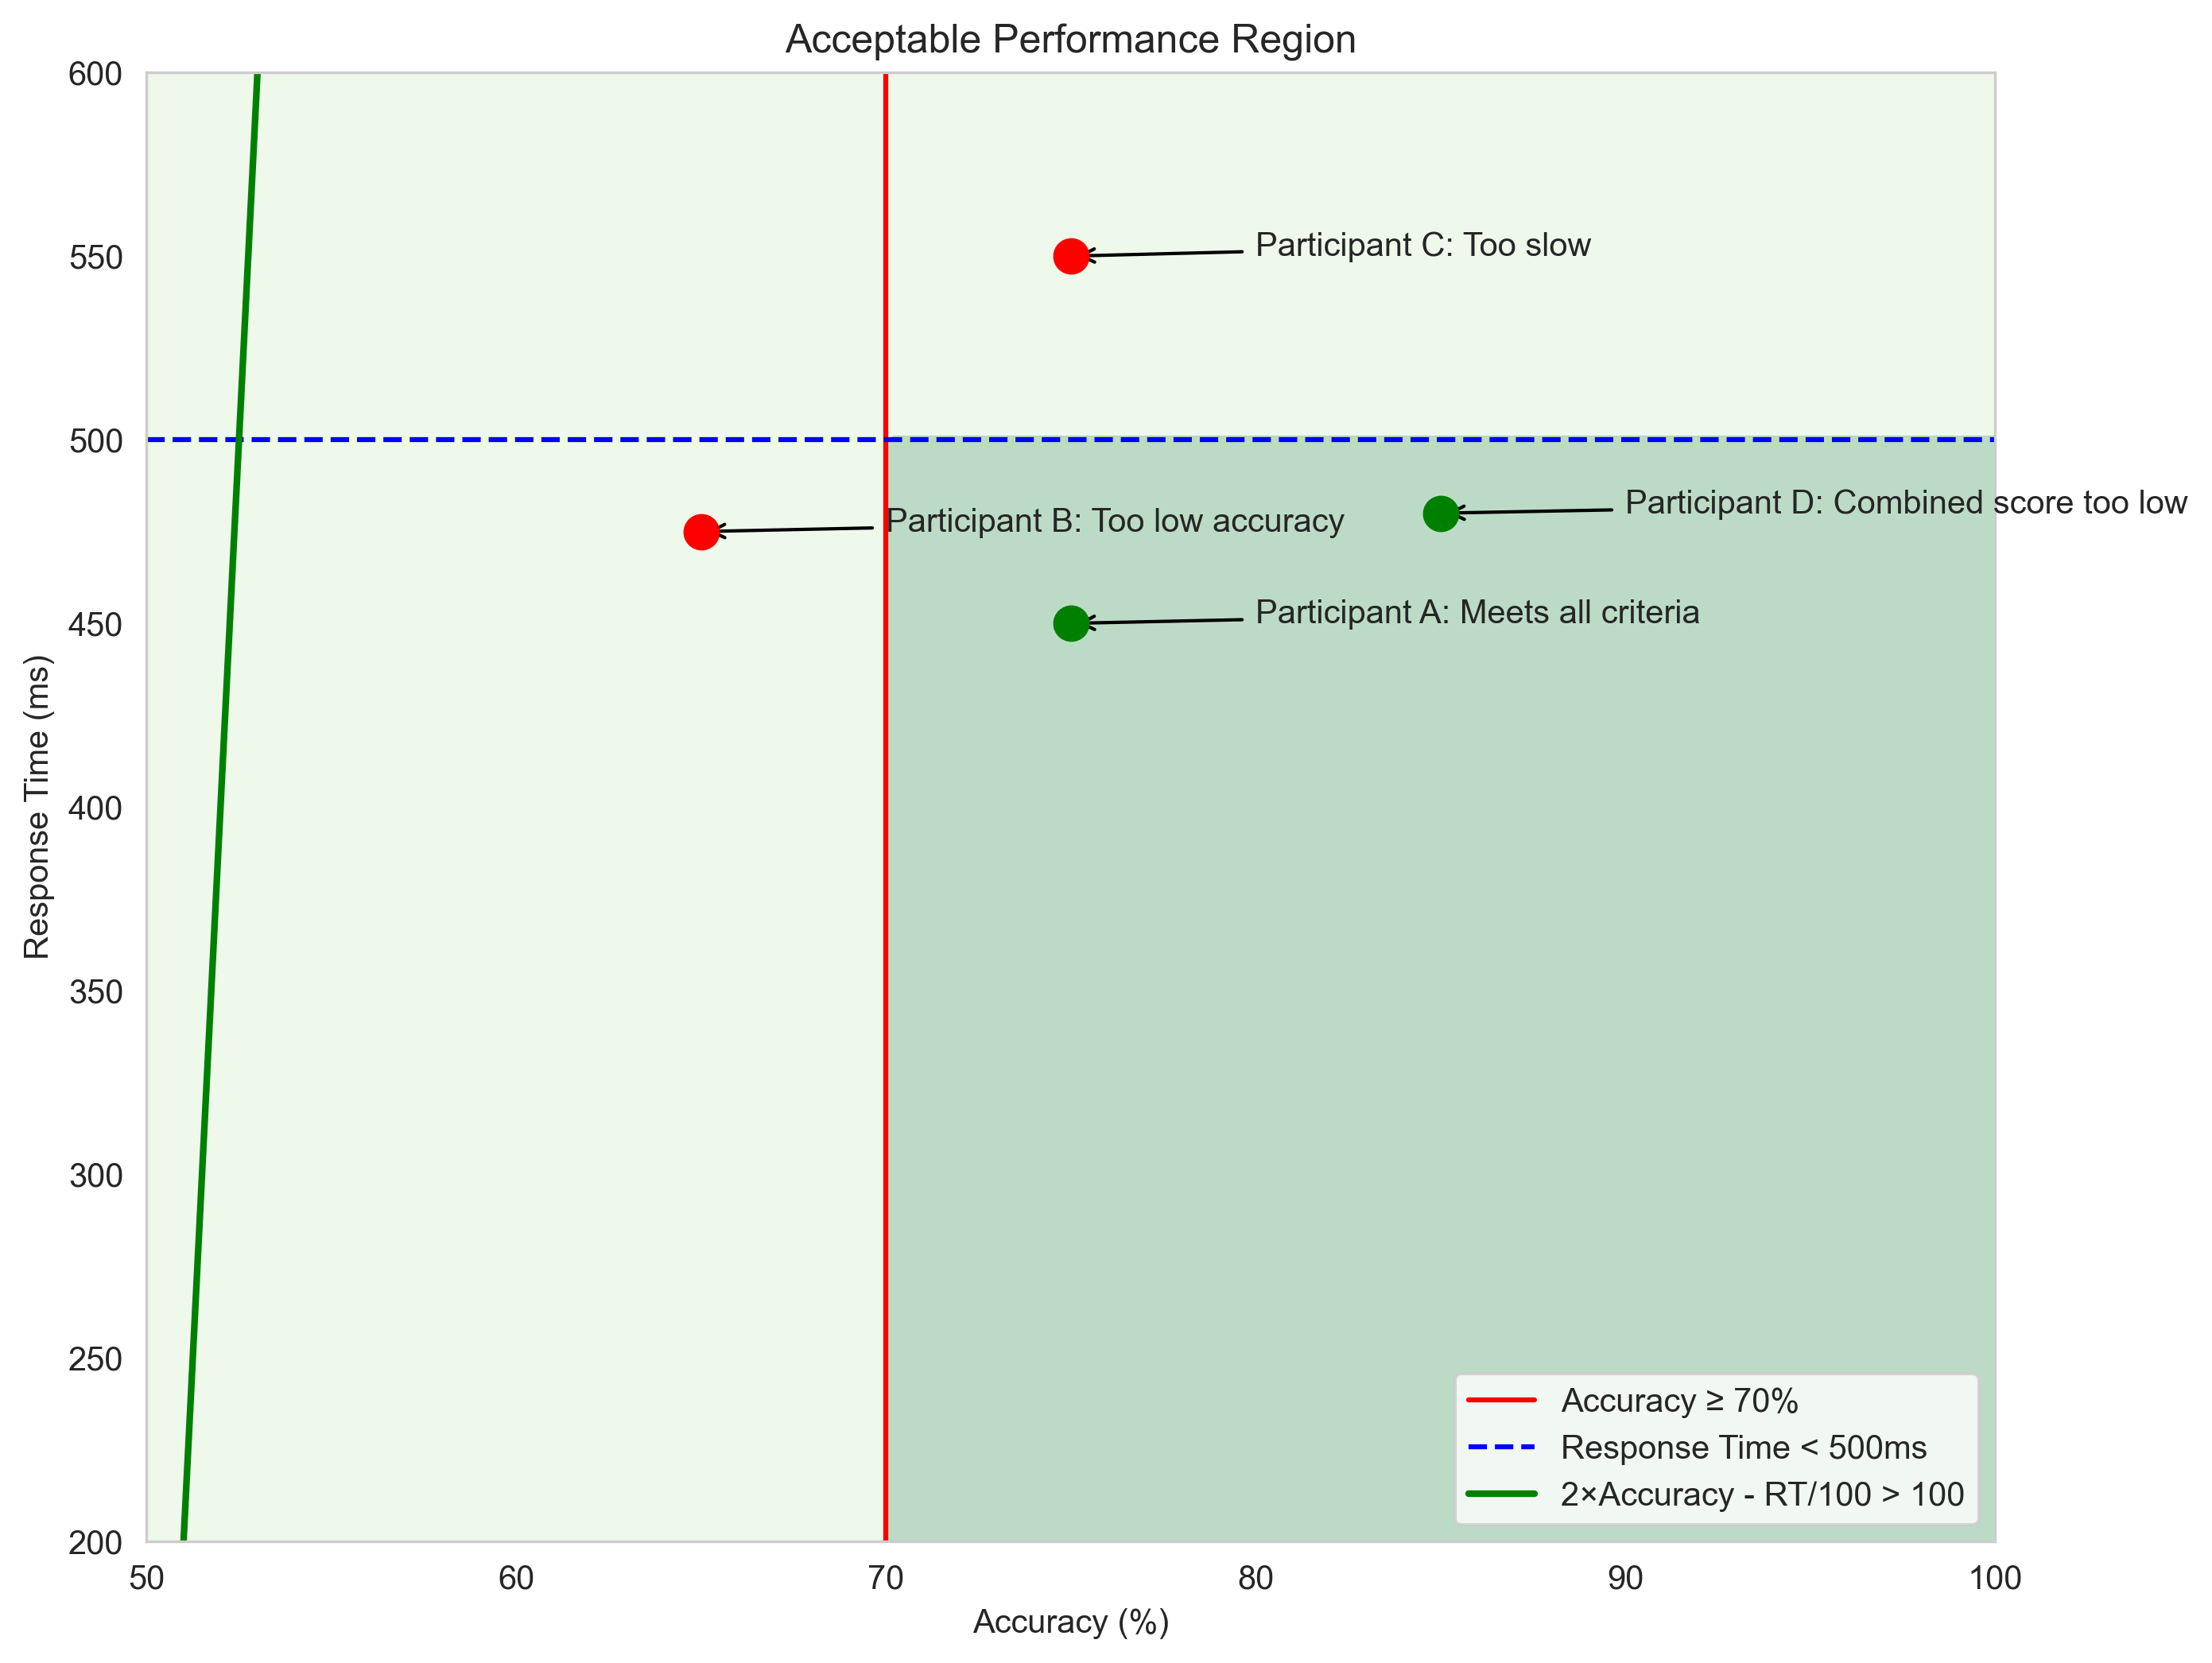

In [12]:
# Create a grid of points
accuracy = np.linspace(50, 100, 100)  # Accuracy from 50% to 100%
response_time = np.linspace(200, 600, 100)  # Response time from 200ms to 600ms
A, RT = np.meshgrid(accuracy, response_time)

# Define the criteria
criterion1 = A >= 70  # Accuracy ≥ 70%
criterion2 = RT < 500  # Response time < 500ms
criterion3 = 2*A - RT/100 > 100  # Combined score > 100

# Combined criteria
acceptable = criterion1 & criterion2 & criterion3

plt.figure(figsize=(10, 8))

# Plot the region
plt.contourf(A, RT, acceptable, alpha=0.3, cmap='Greens')

# Plot the boundaries
plt.axvline(x=70, color='r', linestyle='-', label='Accuracy ≥ 70%')
plt.axhline(y=500, color='b', linestyle='--', label='Response Time < 500ms')

# Plot the combined score boundary
rt_boundary = 2*accuracy - 100
plt.plot(accuracy, rt_boundary*100, 'g-', linewidth=2, label='2×Accuracy - RT/100 > 100')

plt.title('Acceptable Performance Region')
plt.xlabel('Accuracy (%)')
plt.ylabel('Response Time (ms)')
plt.grid(True)
plt.legend()

# Add some example participants
participants = [
    (75, 450, "Participant A: Meets all criteria"),
    (65, 475, "Participant B: Too low accuracy"),
    (75, 550, "Participant C: Too slow"),
    (85, 480, "Participant D: Combined score too low")
]

for acc, rt, label in participants:
    combined = 2*acc - rt/100
    meets_all = (acc >= 70) and (rt < 500) and (combined > 100)
    color = 'green' if meets_all else 'red'
    plt.scatter([acc], [rt], color=color, s=100, zorder=5)
    plt.annotate(label, xy=(acc, rt), xytext=(acc+5, rt),
                 arrowprops=dict(arrowstyle="->", color='black'))
    print(f"{label}")
    print(f"  Accuracy: {acc}% ({'✓' if acc >= 70 else '✗'})")
    print(f"  Response Time: {rt}ms ({'✓' if rt < 500 else '✗'})")
    print(f"  Combined Score: {combined} ({'✓' if combined > 100 else '✗'})")
    print(f"  Overall: {'Acceptable' if meets_all else 'Not Acceptable'}\n")

plt.xlim(50, 100)
plt.ylim(200, 600)
plt.grid(False)
plt.show()

## Systems of Linear Inequalities

A system of linear inequalities consists of two or more inequalities that must be satisfied simultaneously. The solution is the region where all inequalities are true.

In psychology, systems of inequalities might represent:
- Multiple criteria for diagnosis or classification
- Constraints in experimental design
- Boundaries for acceptable performance

Let's visualize a system of inequalities:

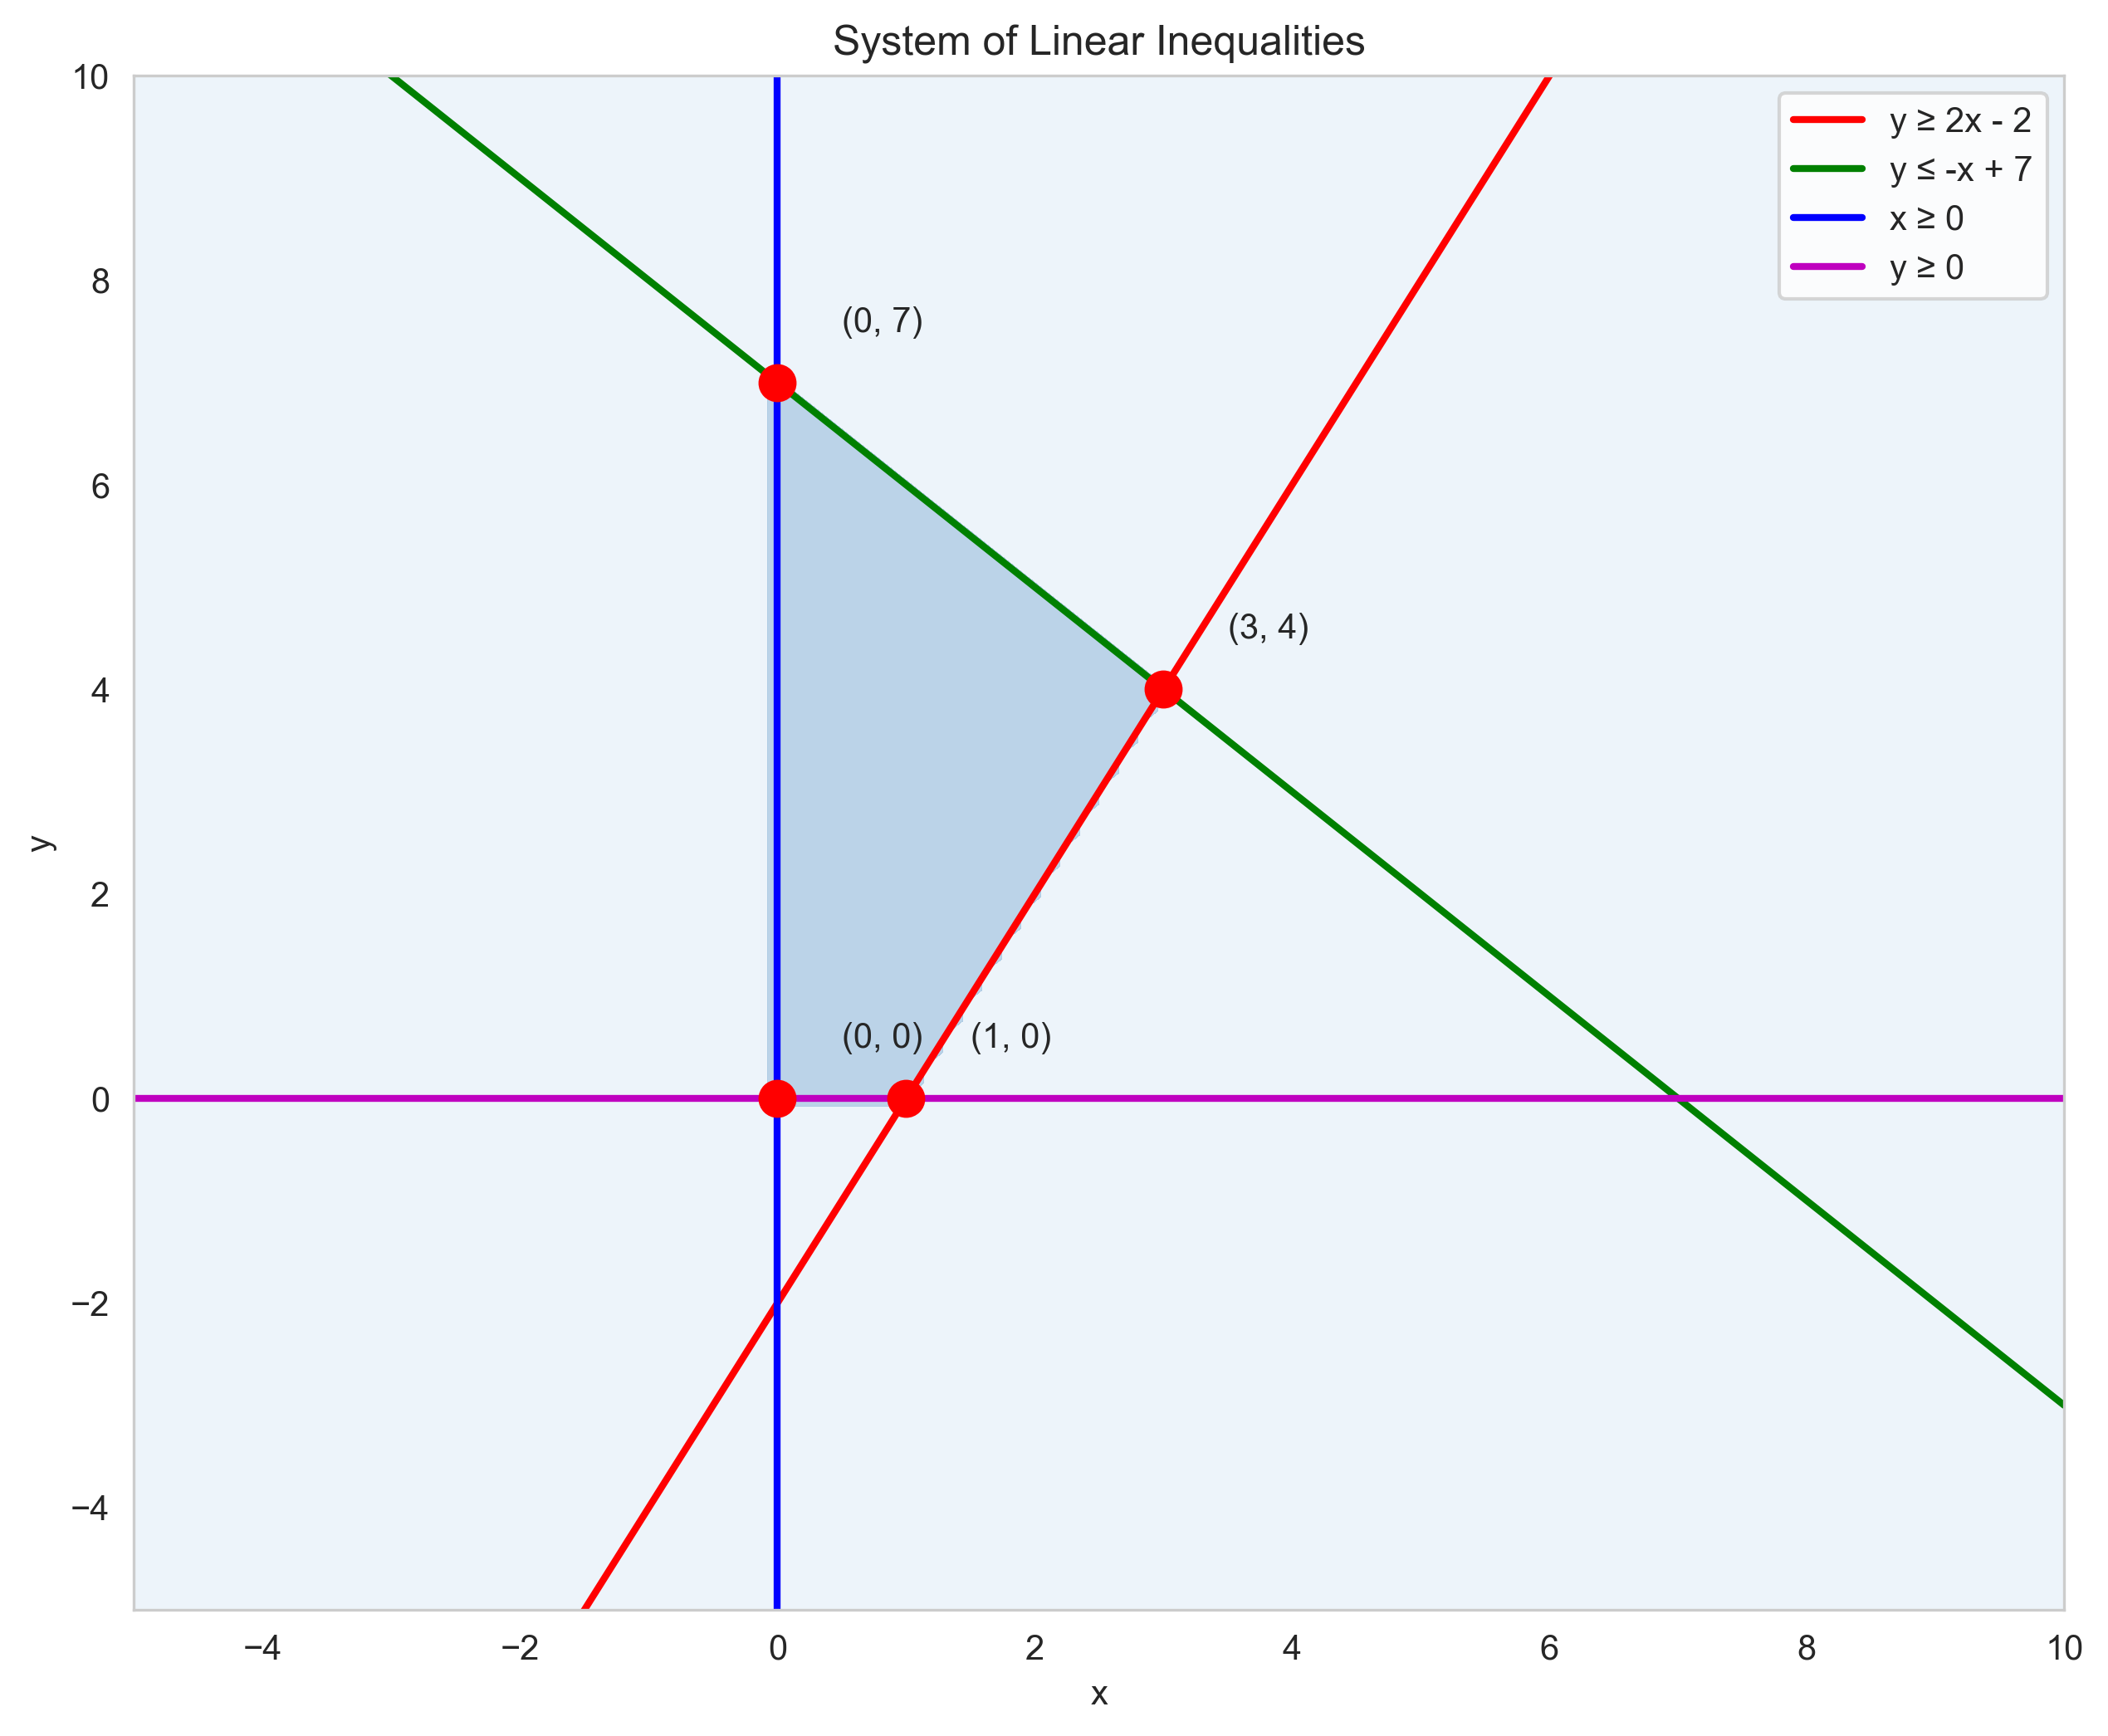

In [13]:
# Create a grid of points
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)

# Define the inequalities
inequality1 = Y >= 2*X - 2  # y ≥ 2x - 2
inequality2 = Y <= -X + 7   # y ≤ -x + 7
inequality3 = X >= 0        # x ≥ 0
inequality4 = Y >= 0        # y ≥ 0

# Combined region
solution_region = inequality1 & inequality2 & inequality3 & inequality4

plt.figure(figsize=(10, 8))

# Plot the region
plt.contourf(X, Y, solution_region, alpha=0.3, cmap='Blues')

# Plot the boundaries
plt.plot(x, 2*x - 2, 'r-', linewidth=2, label='y ≥ 2x - 2')
plt.plot(x, -x + 7, 'g-', linewidth=2, label='y ≤ -x + 7')
plt.axvline(x=0, color='b', linestyle='-', linewidth=2, label='x ≥ 0')
plt.axhline(y=0, color='m', linestyle='-', linewidth=2, label='y ≥ 0')

plt.title('System of Linear Inequalities')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.xlim(-5, 10)
plt.ylim(-5, 10)

# Find and mark the vertices of the solution region
# Solve for intersections of the boundary lines
# Intersection of y = 2x - 2 and y = -x + 7
# 2x - 2 = -x + 7
# 3x = 9
# x = 3, y = 4
vertices = [(0, 0), (0, 7), (3, 4), (1, 0)]
plt.scatter(*zip(*vertices), color='red', s=100, zorder=5)

for i, (vx, vy) in enumerate(vertices):
    plt.annotate(f"({vx}, {vy})", xy=(vx, vy), xytext=(vx+0.5, vy+0.5))
plt.grid(False)
plt.show()

### Psychological Example: Experimental Design Constraints

Let's consider a psychological example where a system of inequalities represents constraints in experimental design. Imagine you're designing a memory experiment with two types of stimuli: words and images. You need to decide how many of each to include, subject to these constraints:

1. The total number of stimuli must be at least 40 (for statistical power)
2. The total number of stimuli cannot exceed 80 (to prevent fatigue)
3. The number of words must be at least twice the number of images (due to processing differences)
4. The number of images must be at least 10 (for minimum category representation)
5. The experiment must not take more than 20 minutes, where each word takes 15 seconds and each image takes 30 seconds

Let's model these constraints and find the feasible region:

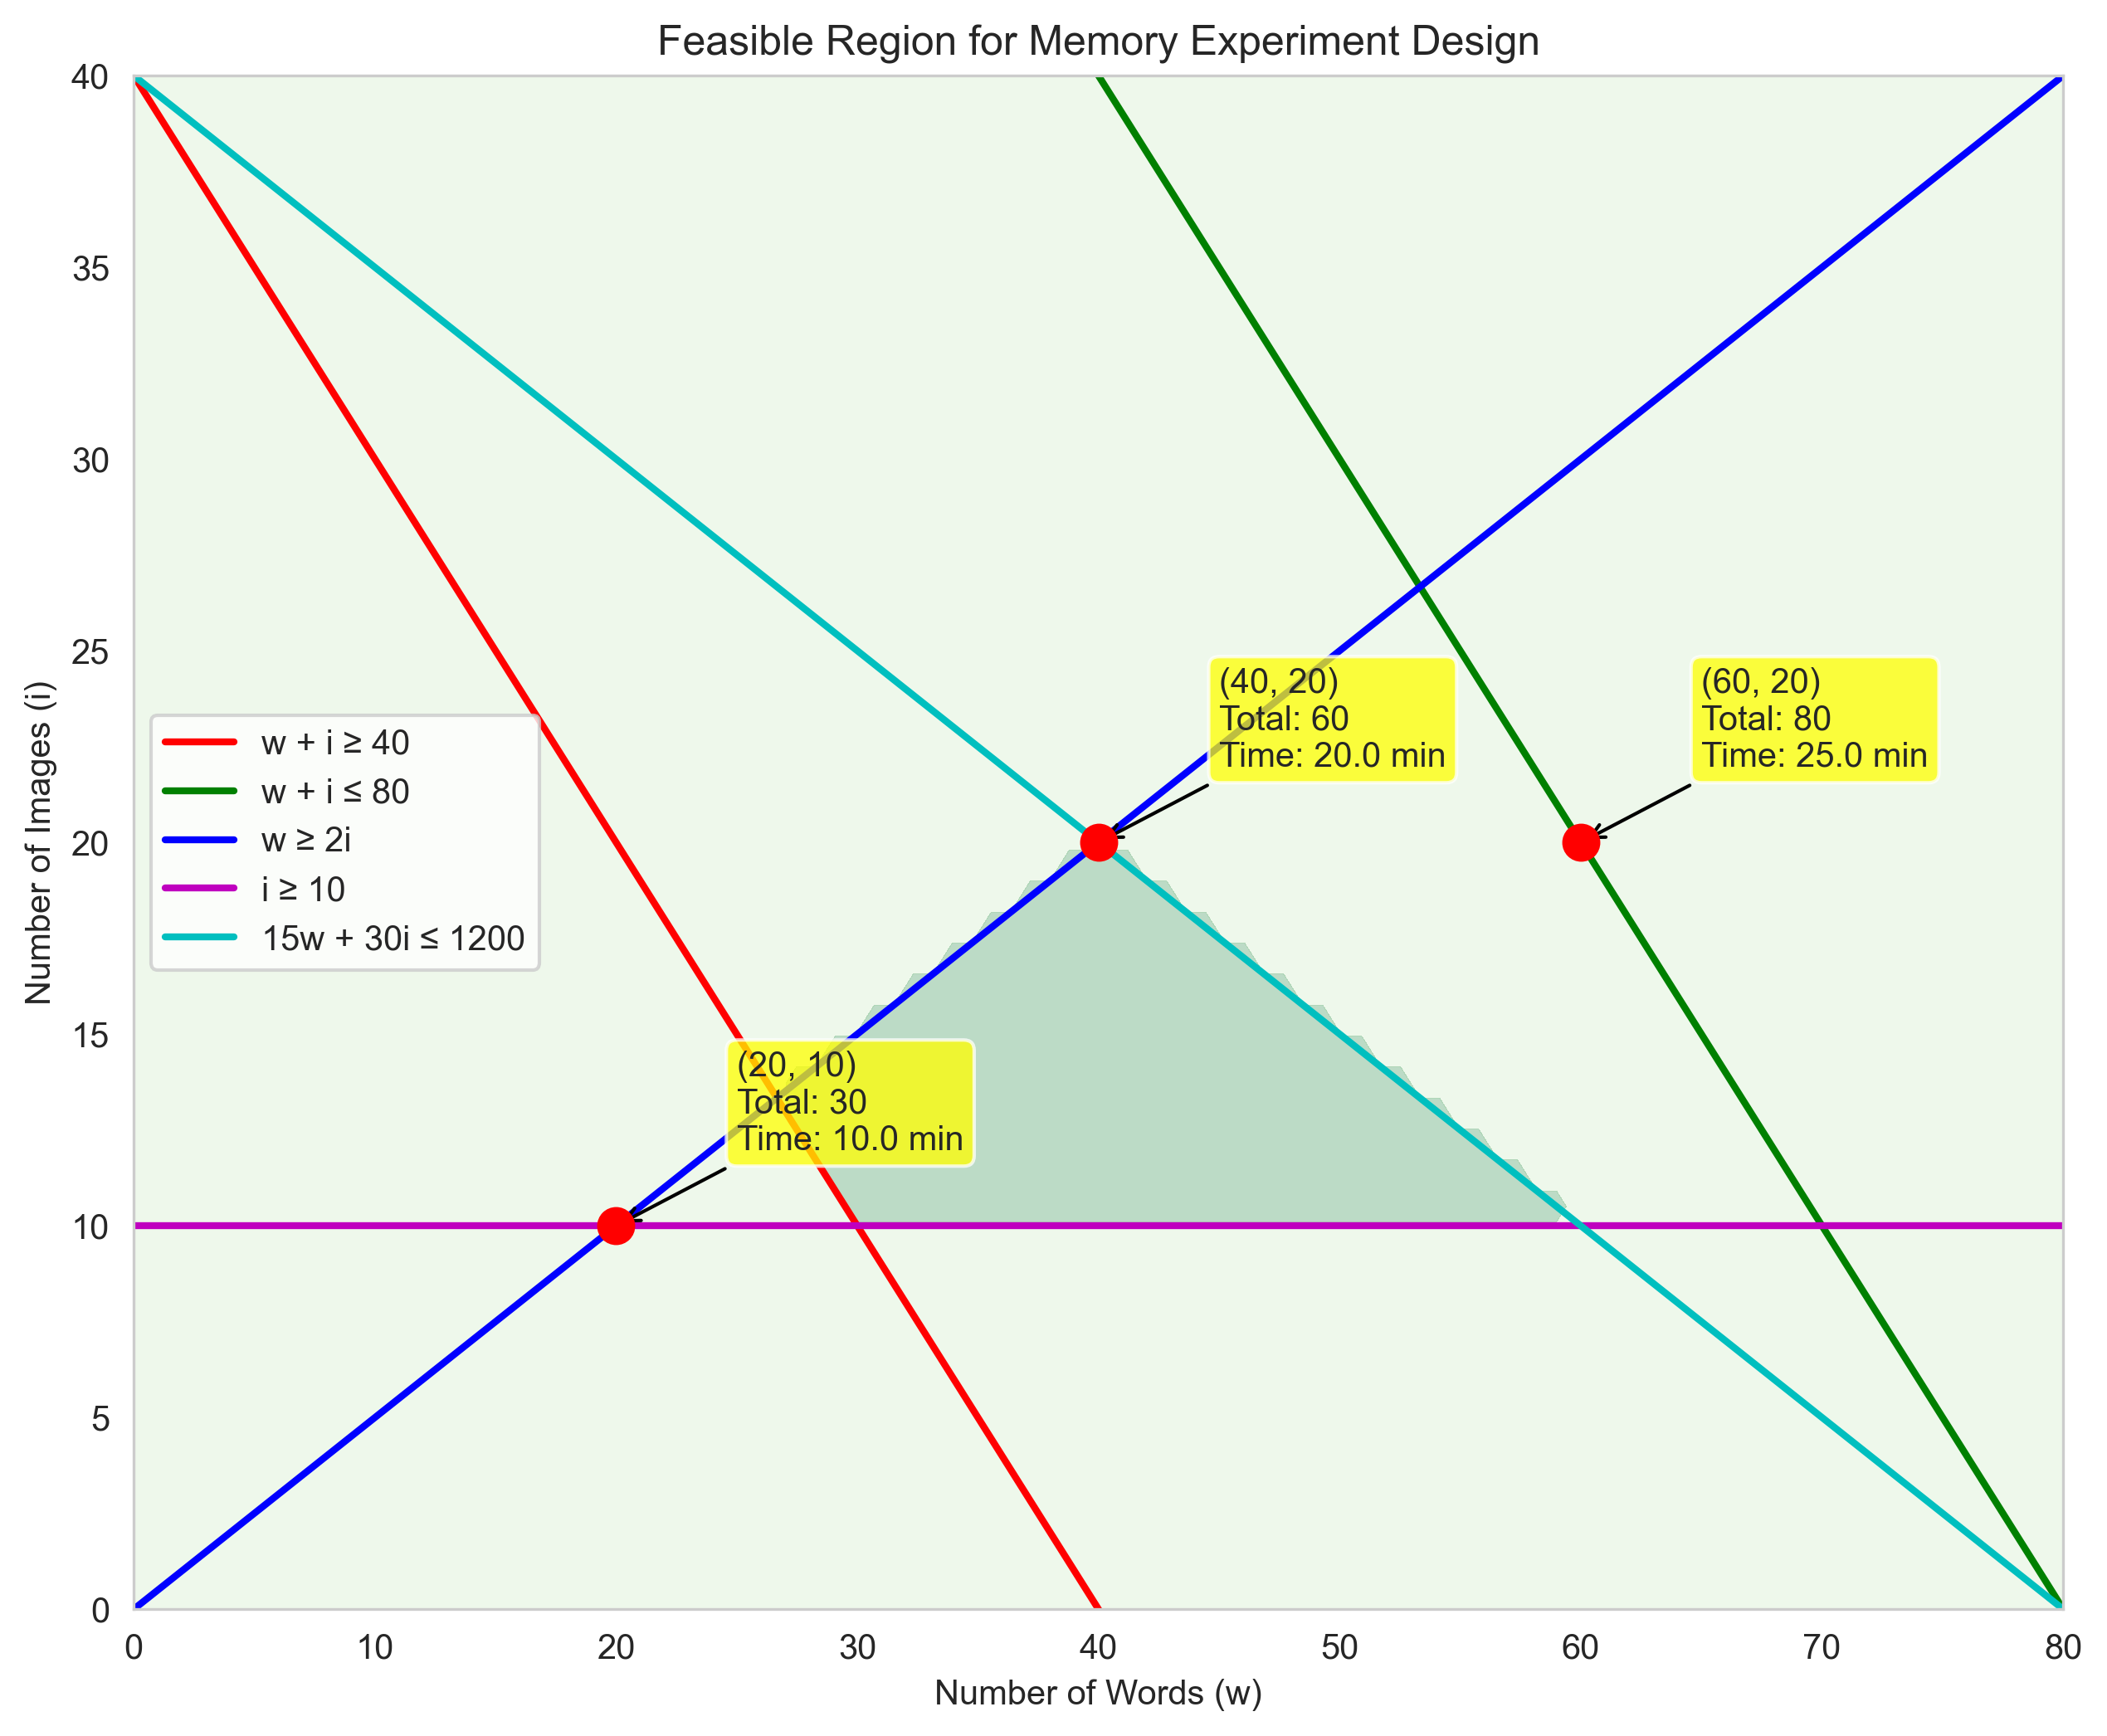

In [14]:
# Define variables
# w = number of words
# i = number of images

# Create a grid of points
words = np.linspace(0, 80, 100)
images = np.linspace(0, 80, 100)
W, I = np.meshgrid(words, images)

# Define the constraints
constraint1 = W + I >= 40                # Total stimuli ≥ 40
constraint2 = W + I <= 80                # Total stimuli ≤ 80
constraint3 = W >= 2*I                   # Words ≥ 2 × Images
constraint4 = I >= 10                    # Images ≥ 10
constraint5 = 15*W + 30*I <= 20*60       # Time constraint: 15s per word, 30s per image, ≤ 20 minutes

# Combined constraints
feasible_region = constraint1 & constraint2 & constraint3 & constraint4 & constraint5

plt.figure(figsize=(10, 8))

# Plot the region
plt.contourf(W, I, feasible_region, alpha=0.3, cmap='Greens')

# Plot the boundaries
plt.plot(words, 40 - words, 'r-', linewidth=2, label='w + i ≥ 40')
plt.plot(words, 80 - words, 'g-', linewidth=2, label='w + i ≤ 80')
plt.plot(words, words/2, 'b-', linewidth=2, label='w ≥ 2i')
plt.axhline(y=10, color='m', linestyle='-', linewidth=2, label='i ≥ 10')
plt.plot(words, (20*60 - 15*words)/30, 'c-', linewidth=2, label='15w + 30i ≤ 1200')

plt.title('Feasible Region for Memory Experiment Design')
plt.xlabel('Number of Words (w)')
plt.ylabel('Number of Images (i)')
plt.grid(True)
plt.legend()
plt.xlim(0, 80)
plt.ylim(0, 40)

# Find and mark some key points in the feasible region
# These are intersections of the constraint boundaries
key_points = [
    (20, 10),  # Minimum words and images
    (60, 20),  # Maximum images with time constraint
    (40, 20),  # Balanced design
]

plt.scatter(*zip(*key_points), color='red', s=100, zorder=5)

for w, i in key_points:
    total = w + i
    time = (15*w + 30*i) / 60  # Time in minutes
    plt.annotate(f"({w}, {i})\nTotal: {total}\nTime: {time:.1f} min", 
                 xy=(w, i), xytext=(w+5, i+2),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.75))
plt.grid(False)
plt.show()

## Summary

In this chapter, we've explored linear equations and graphs, which are fundamental tools for modeling relationships in psychological research. We've learned:

1. **Linear Equations**: The basic form $y = mx + b$, where $m$ is the slope and $b$ is the y-intercept
2. **Different Forms of Linear Equations**: Slope-intercept, point-slope, and standard form
3. **Finding Equations of Lines**: Using slope and intercept, slope and a point, or two points
4. **Parallel and Perpendicular Lines**: Understanding their properties and applications
5. **Finding Intersections**: Determining where two lines meet and interpreting the meaning
6. **Linear Inequalities**: Representing regions that satisfy certain conditions
7. **Systems of Linear Inequalities**: Finding regions that satisfy multiple constraints

These concepts are essential in psychology for:
- Modeling relationships between variables
- Interpreting interactions between factors
- Setting criteria and thresholds
- Designing experiments with multiple constraints
- Visualizing data and trends

Understanding linear equations and graphs allows psychologists to express and analyze relationships mathematically, leading to clearer insights and more precise predictions.

## Practice Problems

1. In a study on learning, researchers found that the number of items recalled (R) after studying for t minutes can be modeled by R = 2t + 5. How long would someone need to study to recall 25 items?

2. A researcher finds that the relationship between stress level (S) and performance (P) for two different groups can be modeled by:
   - Group A: P = 80 - 2S
   - Group B: P = 50 + S
   
   At what stress level do both groups perform equally well? What is the performance at this point?

3. In a reaction time experiment, the relationship between age (A) and reaction time (RT) in milliseconds is RT = 180 + 1.5A. If a 40-year-old participant has a reaction time of 250 ms, is this faster or slower than predicted by the model? By how much?

4. A cognitive assessment requires participants to meet these criteria:
   - Accuracy must be at least 75%
   - Response time must be less than 600 ms
   - The combined score (Accuracy - Response Time/10) must be greater than 20
   
   Would a participant with 80% accuracy and 550 ms response time meet all criteria?

5. In designing a memory experiment, you need to include both words and pictures as stimuli. Each word takes 10 seconds to process, and each picture takes 20 seconds. You have the following constraints:
   - The total number of stimuli must be at least 30
   - The total time cannot exceed 10 minutes (600 seconds)
   - You must include at least 5 pictures
   - You must include at least twice as many words as pictures
   
   What is the maximum number of pictures you can include while satisfying all constraints?

## Solutions to Practice Problems

1. We need to solve for t in the equation R = 2t + 5 when R = 25.
   25 = 2t + 5
   20 = 2t
   t = 10
   
   Someone would need to study for 10 minutes to recall 25 items.

2. To find where both groups perform equally, we set the equations equal to each other:
   80 - 2S = 50 + S
   30 = 3S
   S = 10
   
   At a stress level of 10, both groups perform equally well.
   The performance at this point is:
    The performance at this point is:
    P = 80 - 2(10) = 60 or P = 50 + 10 = 60
    
    3. According to the model, the predicted reaction time for a 40-year-old is:
    RT = 180 + 1.5(40) = 180 + 60 = 240 ms
    
    The actual reaction time was 250 ms, which is 10 ms slower than predicted by the model.
    
    4. Let's check each criterion for a participant with 80% accuracy and 550 ms response time:
   - Accuracy ≥ 75%: 80% ≥ 75% ✓
   - Response time < 600 ms: 550 ms < 600 ms ✓
   - Combined score > 20: 80 - 550/10 = 80 - 55 = 25 > 20 ✓
   
   Yes, the participant meets all criteria.

5. Let's define variables:
   - w = number of words
   - p = number of pictures
   
   The constraints are:
   - w + p ≥ 30 (total stimuli)
   - 10w + 20p ≤ 600 (time constraint)
   - p ≥ 5 (minimum pictures)
   - w ≥ 2p (words to pictures ratio)
   
   To find the maximum number of pictures, we need to solve this system of inequalities.
   From w ≥ 2p, we know w = 2p is the minimum number of words needed.
   Substituting into the time constraint: 10(2p) + 20p ≤ 600
   20p + 20p ≤ 600
   40p ≤ 600
   p ≤ 15
   
   We also need to check the total stimuli constraint:
   w + p ≥ 30
   2p + p ≥ 30
   3p ≥ 30
   p ≥ 10
   
   Combining these constraints: 10 ≤ p ≤ 15
   
   Therefore, the maximum number of pictures possible is 15, with 30 words (2×15).